In [200]:

!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future


In [201]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [245]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [203]:
sns.set(rc={"figure.figsize": (16, 8)})
min_mem_size=6
run_time=222

In [204]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

2


In [205]:
dff.head()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,136,300,120,13.0,20,5.0,25,0.0,260,87,...,31,10,4,17,3,17,10,0,25,15
1,135,250,70,8.0,12,3.0,15,0.0,25,8,...,30,10,4,17,3,18,6,0,25,8
2,111,370,200,23.0,35,8.0,42,0.0,45,15,...,29,10,4,17,2,14,8,0,25,10
3,161,450,250,28.0,43,10.0,52,0.0,285,95,...,30,10,4,17,2,21,15,0,30,15
4,161,400,210,23.0,35,8.0,42,0.0,50,16,...,30,10,4,17,2,21,6,0,25,10


In [206]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:29313..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpd0oljn0m
  JVM stdout: /tmp/tmpd0oljn0m/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpd0oljn0m/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:29313
Connecting to H2O server at http://127.0.0.1:29313 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_nb0v28
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [207]:
url = "https://raw.githubusercontent.com/vijeth-sr/DSEM/main/mcd_menu.csv?token=GHSAT0AAAAAACOMH5W7BJZNE47V2X7U7KK4ZOT6LGQ"
path = 'mcd_menu.csv'
dff = pd.read_csv(url)
dff = dff.drop(['Category', 'Item'], axis=1)
h2o_dff = h2o.H2OFrame(dff)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [208]:
dff.head()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,136,300,120,13.0,20,5.0,25,0.0,260,87,...,31,10,4,17,3,17,10,0,25,15
1,135,250,70,8.0,12,3.0,15,0.0,25,8,...,30,10,4,17,3,18,6,0,25,8
2,111,370,200,23.0,35,8.0,42,0.0,45,15,...,29,10,4,17,2,14,8,0,25,10
3,161,450,250,28.0,43,10.0,52,0.0,285,95,...,30,10,4,17,2,21,15,0,30,15
4,161,400,210,23.0,35,8.0,42,0.0,50,16,...,30,10,4,17,2,21,6,0,25,10


In [209]:
dff.corr()


,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Serving Size,1.000000,0.634260,0.723090,0.722048,0.721936,0.481414,0.485480,0.182214,0.488889,0.487938,...,0.228204,0.227167,0.709638,0.714702,-0.310909,0.743394,0.287114,0.109594,-0.017601,0.779157
Calories,0.634260,1.000000,0.904588,0.904409,0.904123,0.845564,0.847631,0.522441,0.596399,0.595208,...,0.781539,0.781242,0.538894,0.540014,0.259598,0.787847,0.108844,-0.068747,0.428426,0.643552
Calories from Fat,0.723090,0.904588,1.000000,0.999663,0.999725,0.847008,0.849592,0.433686,0.682161,0.681607,...,0.461672,0.461463,0.581274,0.575621,-0.115285,0.807913,0.056731,-0.087331,0.161034,0.735894
Total Fat,0.722048,0.904409,0.999663,1.000000,0.999765,0.846707,0.849293,0.431453,0.680547,0.680000,...,0.461213,0.461005,0.580837,0.575206,-0.115446,0.807773,0.054434,-0.089354,0.162860,0.734685
Total Fat (% Daily Value),0.721936,0.904123,0.999725,0.999765,1.000000,0.847379,0.849973,0.433016,0.680940,0.680378,...,0.460516,0.460298,0.580592,0.575033,-0.115761,0.807922,0.054038,-0.089353,0.162031,0.735478
Saturated Fat,0.481414,0.845564,0.847008,0.846707,0.847379,1.000000,0.999279,0.620611,0.631210,0.630334,...,0.591261,0.591743,0.351818,0.347152,0.197734,0.603028,0.064972,-0.179672,0.403311,0.578062
Saturated Fat (% Daily Value),0.485480,0.847631,0.849592,0.849293,0.849973,0.999279,1.000000,0.620210,0.633603,0.632712,...,0.591322,0.591655,0.356831,0.351797,0.195928,0.606581,0.065376,-0.178059,0.401139,0.580488
Trans Fat,0.182214,0.522441,0.433686,0.431453,0.433016,0.620611,0.620210,1.000000,0.253935,0.251502,...,0.463250,0.462891,0.054918,0.058301,0.334756,0.388249,0.075833,-0.076612,0.385331,0.325476
Cholesterol,0.488889,0.596399,0.682161,0.680547,0.680940,0.631210,0.633603,0.253935,1.000000,0.999855,...,0.270977,0.272662,0.435575,0.440266,-0.135518,0.561561,0.080239,-0.082978,0.132077,0.655000
Cholesterol (% Daily Value),0.487938,0.595208,0.681607,0.680000,0.680378,0.630334,0.632712,0.251502,0.999855,1.000000,...,0.269300,0.270992,0.434940,0.439814,-0.136459,0.560957,0.080059,-0.083315,0.132382,0.653167


<Axes: >

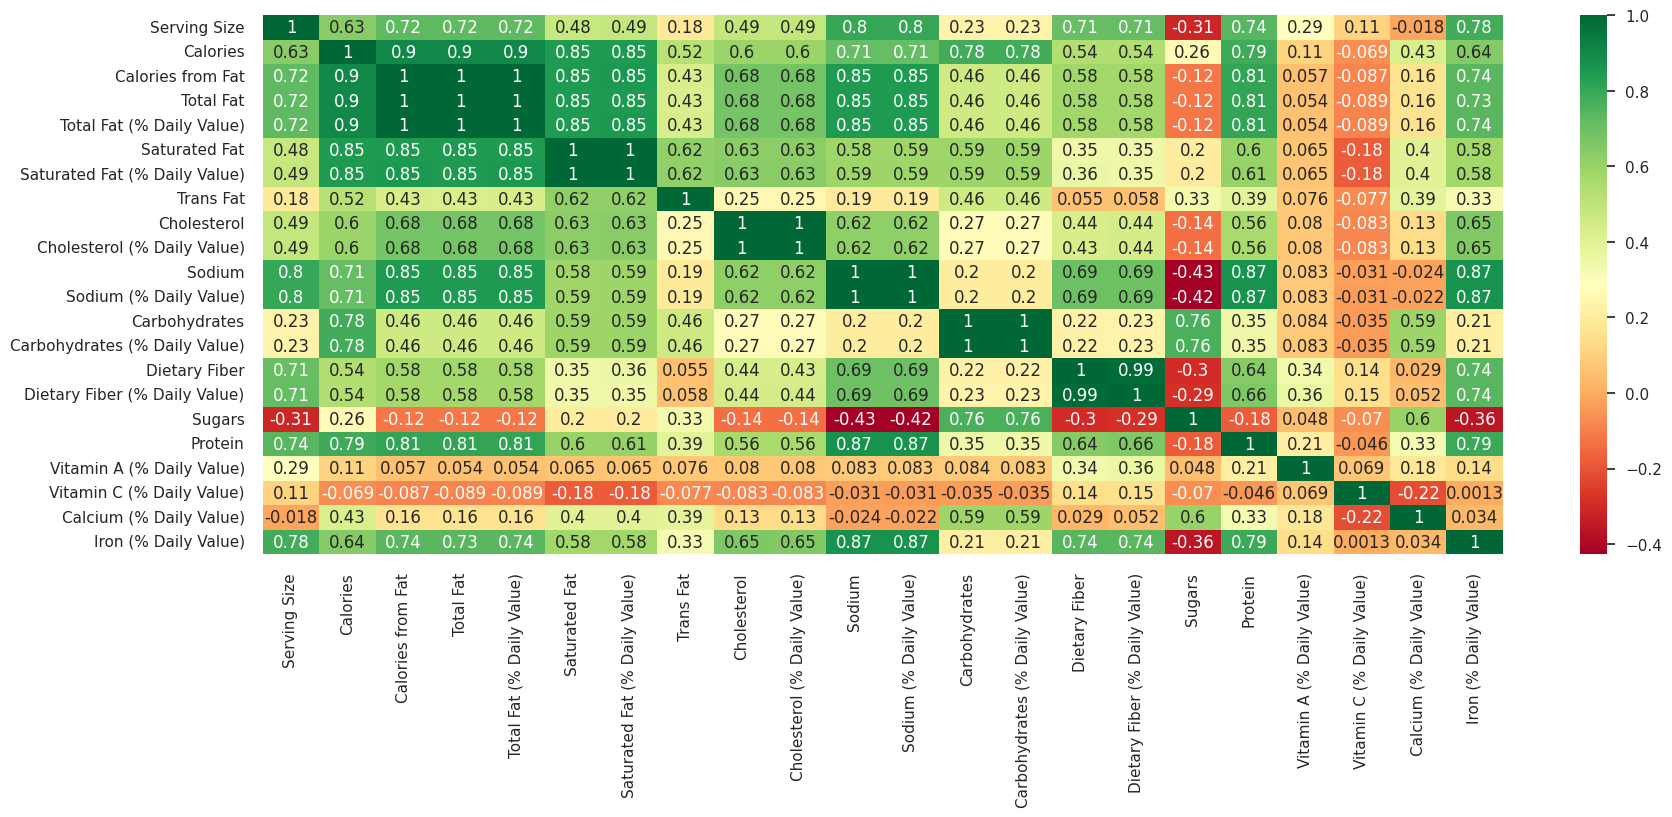

In [210]:
plt.figure(figsize=(20,7))
sns.heatmap(dff.corr(), annot=True, cmap='RdYlGn')

In [211]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(dff['Calories'], dff[['Serving Size',	'Calories',	'Calories from Fat'	,'Total Fat',	'Total Fat (% Daily Value)',	'Saturated Fat',	'Saturated Fat (% Daily Value)',	'Trans Fat'	,'Cholesterol',	'Cholesterol (% Daily Value)',	'Sodium',	'Sodium (% Daily Value)',	'Carbohydrates',	'Carbohydrates (% Daily Value)',	'Dietary Fiber',	'Dietary Fiber (% Daily Value)',	'Sugars',	'Protein',	'Vitamin A (% Daily Value)',	'Vitamin C (% Daily Value)',	'Calcium (% Daily Value)',	'Iron (% Daily Value)']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Calories   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.733e+29
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        23:45:43   Log-Likelihood:                          6491.5
No. Observations:                 260   AIC:                                 -1.294e+04
Df Residuals:                     238   BIC:                                 -1.286e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Serving Size                  -1.138e-15   4.06e-15     -0.280      0.779   -9.13e-15    6.86e-15
Calories                          1.0000   4.72e-14   2.12e+13      0.000       1.000       1.000
Calories from Fat              4.885e-15   8.32e-14      0.059      0.953   -1.59e-13    1.69e-13
Total Fat                     -9.237e-14   8.09e-13     -0.114      0.909   -1.69e-12     1.5e-12
Total Fat (% Daily Value)     -2.487e-14   5.88e-13     -0.042      0.966   -1.18e-12    1.13e-12
Saturated Fat                 -1.137e-13   1.17e-12     -0.097      0.923   -2.42e-12    2.19e-12
Saturated Fat (% Daily Value)  1.421e-14   2.36e-13      0.060      0.952   -4.51e-13     4.8e-13
Trans Fat                     -6.395e-14   9.23e-13     -0.069      0.945   -1.88e-12    1.75e-12
Cholesterol                     9.77e-15   1.57e-13      0.062      0.951      -3e-13     3.2e-13
Cholesterol (% Daily Value)   -3.908e-14   4.72e-13     -0.083      0.934   -9.69e-13     8.9e-13
Sodium                        -8.327e-16   3.49e-14     -0.024      0.981   -6.95e-14    6.78e-14
Sodium (% Daily Value)        -3.553e-15    8.3e-13     -0.004      0.997   -1.64e-12    1.63e-12
Carbohydrates                 -6.217e-14   3.61e-13     -0.172      0.864   -7.74e-13     6.5e-13
Carbohydrates (% Daily Value)  2.842e-14   8.92e-13      0.032      0.975   -1.73e-12    1.79e-12
Dietary Fiber                 -3.553e-14   9.31e-13     -0.038      0.970   -1.87e-12     1.8e-12
Dietary Fiber (% Daily Value) -5.329e-15   2.37e-13     -0.022      0.982   -4.72e-13    4.62e-13
Sugars                         4.441e-16   4.29e-14      0.010      0.992    -8.4e-14    8.49e-14
Protein                        -3.73e-14   2.06e-13     -0.181      0.856   -4.43e-13    3.68e-13
Vitamin A (% Daily Value)       2.72e-15   1.18e-14      0.230      0.818   -2.05e-14     2.6e-14
Vitamin C (% Daily Value)     -3.331e-16    9.6e-15     -0.035      0.972   -1.92e-14    1.86e-14
Calcium (% Daily Value)       -4.441e-15   3.03e-14     -0.147      0.883    -6.4e-14    5.52e-14
Iron (% Daily Value)           1.044e-14   8.21e-14      0.127      0.899   -1.51e-13    1.72e-13
==============================================================================
Omnibus:                       78.624   Durbin-Watson:                   0.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.329
Skew:                           1.326   Prob(JB):                     1.59e-50
Kurtosis:                       6.760   Cond. No.                     4.85e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) si

## **Main Issues in the Results:**

The dependent variable 'Calories' appears as an independent variable, which is not correct and leads to a perfect R-squared value.
The model seems to have multicollinearity issues as indicated by the high condition number. This often happens when independent variables are highly correlated with each other.
In summary, these results suggest that the model has significant issues, most notably the inclusion of the output variable 'Calories' as an input feature. This needs to be corrected before the model's results can be considered reliable. Additionally, the potential multicollinearity should be addressed, possibly by removing or combining highly correlated features.







In [212]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = h2o_dff.split_frame([pct_rows])

In [213]:
print(df_train.shape)
print(df_test.shape)

(200, 22)
(60, 22)


In [214]:
df_train.head()

Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
136,300,120,13,20,5,25,0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
135,250,70,8,12,3,15,0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
111,370,200,23,35,8,42,0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
161,450,250,28,43,10,52,0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
161,400,210,23,35,8,42,0,50,16,880,37,30,10,4,17,2,21,6,0,25,10
185,430,210,23,36,9,46,1,300,100,960,40,31,10,4,18,3,26,15,2,30,20
164,520,270,30,47,14,68,0,250,83,1410,59,43,14,3,12,4,19,15,8,20,20
153,410,180,20,32,11,56,0,35,11,1300,54,36,12,2,7,3,20,2,8,15,10
167,470,220,25,38,12,59,0,35,11,1420,59,42,14,3,12,4,20,6,8,15,15
117,430,240,27,42,12,62,0,30,10,1080,45,34,11,2,6,2,11,0,0,6,15


In [216]:
X = h2o_dff.columns
print(X)

['Serving Size', 'Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']


In [218]:
# Set target and predictor variables
y = "Calories"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['Serving Size', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']


In [219]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [220]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |███
23:53:06.622: GBM_1_AutoML_1_20240219_235258 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20240219_235258.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 160.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 160.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 160.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 160.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 160.0.


████████████████████████████████████

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20240219_235258_model_1


Status of Neuron Layers: predicting Calories, regression, gaussian distribution, Quadratic loss, 2,301 weights/biases, 33.9 KB, 248,000 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms                momentum    mean_weight             weight_rms           mean_bias              bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ----------------------  ----------  ----------------------  -------------------  ---------------------  -----------------------
    1        21       Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.019687554070814735   0.03093622624874115     0.0         0.005377813349228485    0.12978750467300415  0.2980838558905317     0.18126994371414185
    3        1        Linear                       0.0   0.0   0.0005715378469903954  0.00046182714868336916  0.0         -0.0010334448609501123  0.05739565193653107  -0.026636586740368152  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 728.5997831821564
RMSE: 26.99258755996091
MAE: 20.355151017172872
RMSLE: NaN
Mean Residual Deviance: 728.5997831821564

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 690.8567984681629
RMSE: 26.284154893550657
MAE: 19.1840860882825
RMSLE: NaN
Mean Residual Deviance: 690.8567984681629

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     19.8694   2.94338    21.2781       24.2445       18.8834       18.1935       16.7474
mean_residual_deviance  835.891   259.102    1122.59       1102.13       728.965       660.588       565.175
mse                     835.891   259.102    1122.59       1102.13       728.965       660.588       565.175
r2                      0.984427  0.006756   0.99007       0.972927      0.984968      0.985659      0.98851
residual_deviance       835.891   259.102    1122.59       1102.13       728.965       660.588       565.175
rmse                    28.6356   4.45691    33.5051       33.1984       26.9994       25.7019       23.7734
rmsle                   0.717938  0.0650984  0.654303      nan           0.784407      0.715105      nan

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-02-19 23:56:06  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2024-02-19 23:56:06  33.863 sec  51282 obs/sec     10        1             2000       50.0805          2508.06              39.7928         0.95852
    2024-02-19 23:56:11  38.873 sec  49138 obs/sec     1240      124           248000     26.9926          728.6                20.3552         0.98795

Variable Importances: 
variable                       relative_importance    scaled_importance    percentage
-----------------------------  ---------------------  -------------------  --------------------
Carbohydrates                  1.0                    1.0                  0.06950688719578067
Carbohydrates (% Daily Value)  0.9452127814292908     0.9452127814292908   0.06569879817481582
Cholesterol                    0.8751831650733948     0.8751831650733948   0.06083125753040275
Sugars                         0.8457266688346863     0.8457266688346863   0.0587838281691559
Vitamin C (% Daily Value

In [221]:
print(
    aml.leaderboard
)

model_id                                                    rmse       mse      mae       rmsle    mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20240219_235258_model_1     26.2842   690.857  19.1841  nan                          690.857
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_235258  31.0968   967.012  16.8751  nan                          967.012
DeepLearning_grid_1_AutoML_1_20240219_235258_model_3     37.3041  1391.6    25.3154  nan                         1391.6
DeepLearning_grid_1_AutoML_1_20240219_235258_model_2     43.0543  1853.68   28.0365  nan                         1853.68
DeepLearning_grid_1_AutoML_1_20240219_235258_model_4     46.6832  2179.32   33.8653  nan                         2179.32
DeepLearning_grid_3_AutoML_1_20240219_235258_model_1     52.9685  2805.66   33.3066    0.927118                  2805.66
DeepLearning_grid_2_AutoML_1_20240219_235258_model_1     57.7324  3333.03   32.7068  nan                         3333.03
StackedEnsemble_BestOfFamily_3

In [222]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20240219_235258_model_1,26.2842,690.857,19.1841,nan,690.857
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_235258,31.0968,967.012,16.8751,nan,967.012
DeepLearning_grid_1_AutoML_1_20240219_235258_model_3,37.3041,1391.6,25.3154,nan,1391.6
DeepLearning_grid_1_AutoML_1_20240219_235258_model_2,43.0543,1853.68,28.0365,nan,1853.68
DeepLearning_grid_1_AutoML_1_20240219_235258_model_4,46.6832,2179.32,33.8653,nan,2179.32
DeepLearning_grid_3_AutoML_1_20240219_235258_model_1,52.9685,2805.66,33.3066,0.927118,2805.66
DeepLearning_grid_2_AutoML_1_20240219_235258_model_1,57.7324,3333.03,32.7068,nan,3333.03
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_235258,60.1995,3623.98,27.9019,nan,3623.98
StackedEnsemble_BestOfFamily_1_AutoML_1_20240219_235258,61.6645,3802.51,32.4158,0.678262,3802.51
StackedEnsemble_AllModels_4_AutoML_1_20240219_235258,62.3645,3889.33,30.8898,1.03792,3889.33


## Is the relationship significant?

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


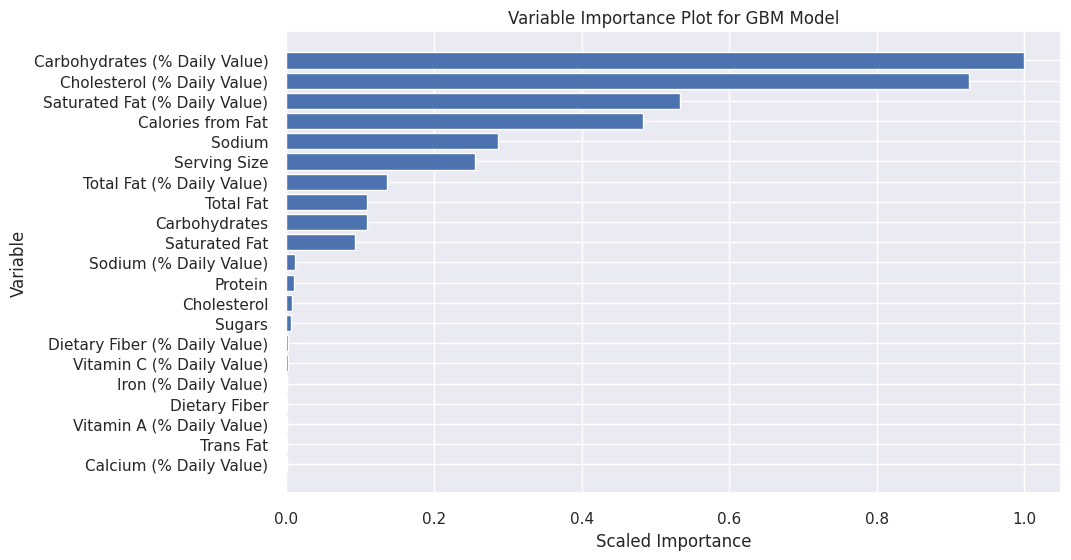

In [229]:
# Get the GBM Model from the leaderboard
model_row = aml.leaderboard.as_data_frame().iloc[17]

# Get model ID from the row
model_id = model_row['model_id']

# Retrieve the GBM model using the model ID
model = h2o.get_model(model_id)

# Retrieve the variable importance
varimp = model.varimp(use_pandas=True)

# Convert varimp dataframe to dictionary for plotting
varimp_dict = dict(zip(varimp['variable'], varimp['scaled_importance']))

# Sort variable importance dictionary by importance values
varimp_sorted = sorted(varimp_dict.items(), key=lambda x: x[1], reverse=True)

# Plot variable importance
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in varimp_sorted], [x[1] for x in varimp_sorted])
plt.xlabel('Scaled Importance')
plt.ylabel('Variable')
plt.title('Variable Importance Plot for GBM Model')
plt.gca().invert_yaxis()  # Invert y-axis to display variables with highest importance at the top
plt.show()

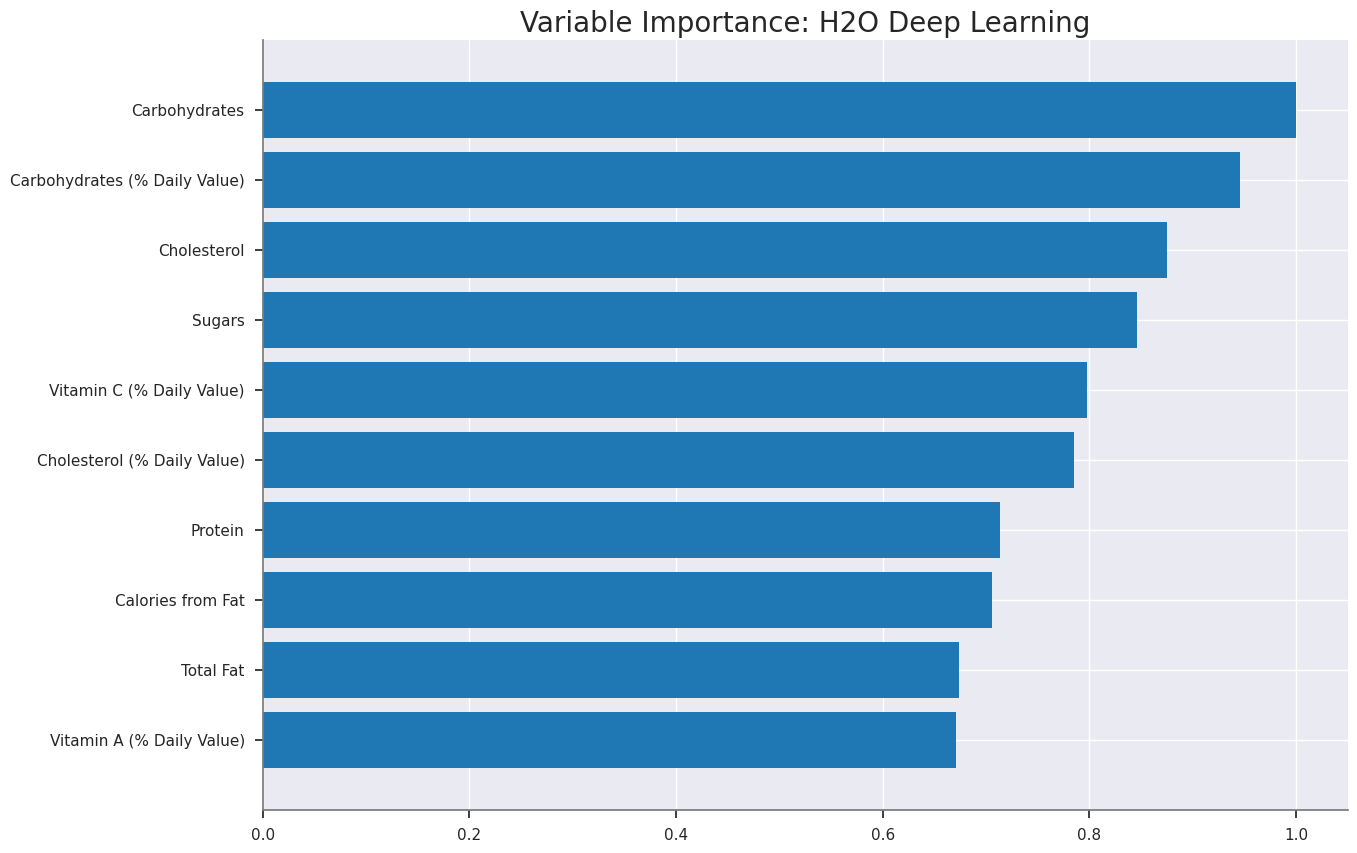

<Figure size 1600x800 with 0 Axes>

In [228]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(dff['Calories'], dff[['Serving Size',	'Calories from Fat'	,'Total Fat',	'Total Fat (% Daily Value)',	'Saturated Fat',	'Saturated Fat (% Daily Value)',	'Trans Fat'	,'Cholesterol',	'Cholesterol (% Daily Value)',	'Sodium',	'Sodium (% Daily Value)',	'Carbohydrates',	'Carbohydrates (% Daily Value)',	'Dietary Fiber',	'Dietary Fiber (% Daily Value)',	'Sugars',	'Protein',	'Vitamin A (% Daily Value)',	'Vitamin C (% Daily Value)',	'Calcium (% Daily Value)',	'Iron (% Daily Value)']]).fit()

p_values = model.pvalues

# Step 5: Sort p-values in ascending order
sorted_p_values = p_values.sort_values(ascending=True)

# Step 6: Display the significant p-values (i.e. p < 0.05)
significant_p_values = sorted_p_values[sorted_p_values < 0.05]

print(significant_p_values)

Protein                          4.759175e-94
Carbohydrates                    9.962111e-22
Sugars                           2.920605e-05
Total Fat (% Daily Value)        2.733551e-04
Vitamin C (% Daily Value)        7.679593e-04
Calcium (% Daily Value)          1.778316e-03
Dietary Fiber (% Daily Value)    5.324444e-03
Total Fat                        8.271482e-03
Dietary Fiber                    2.716506e-02
dtype: float64


In [251]:
significant_variables = ['Protein','Carbohydrates','Sugars','Total Fat (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)','Dietary Fiber (% Daily Value)','Total Fat','Dietary Fiber']

## Are any model assumptions violated?

In [233]:
X = dff.drop('Calories', axis=1)
y = dff['Calories']

In [234]:
X.head()

,Serving Size,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,136,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
1,135,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
2,111,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,161,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,161,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10


In [235]:
Y.head()

0    300
1    250
2    370
3    450
4    400
Name: Calories, dtype: int64

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [241]:
# Intialize the linear regression model
model = LinearRegression()

#Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

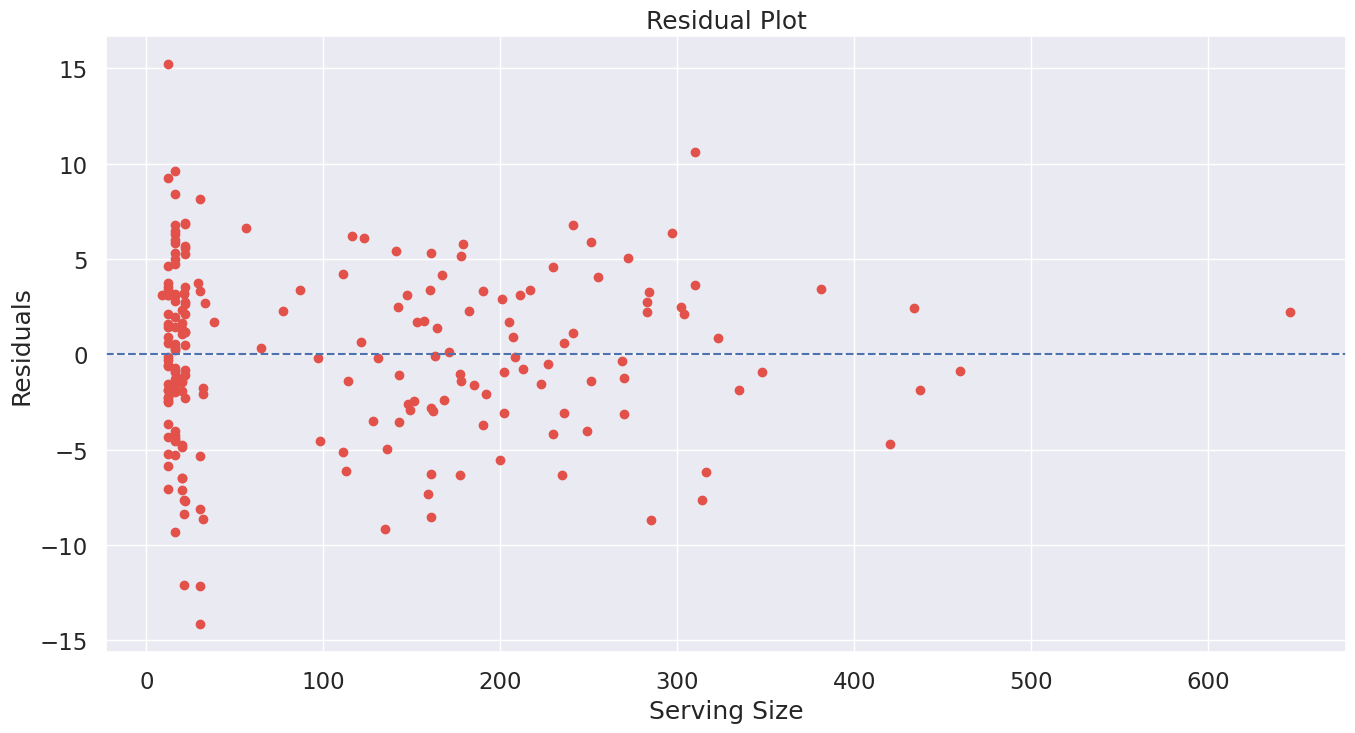

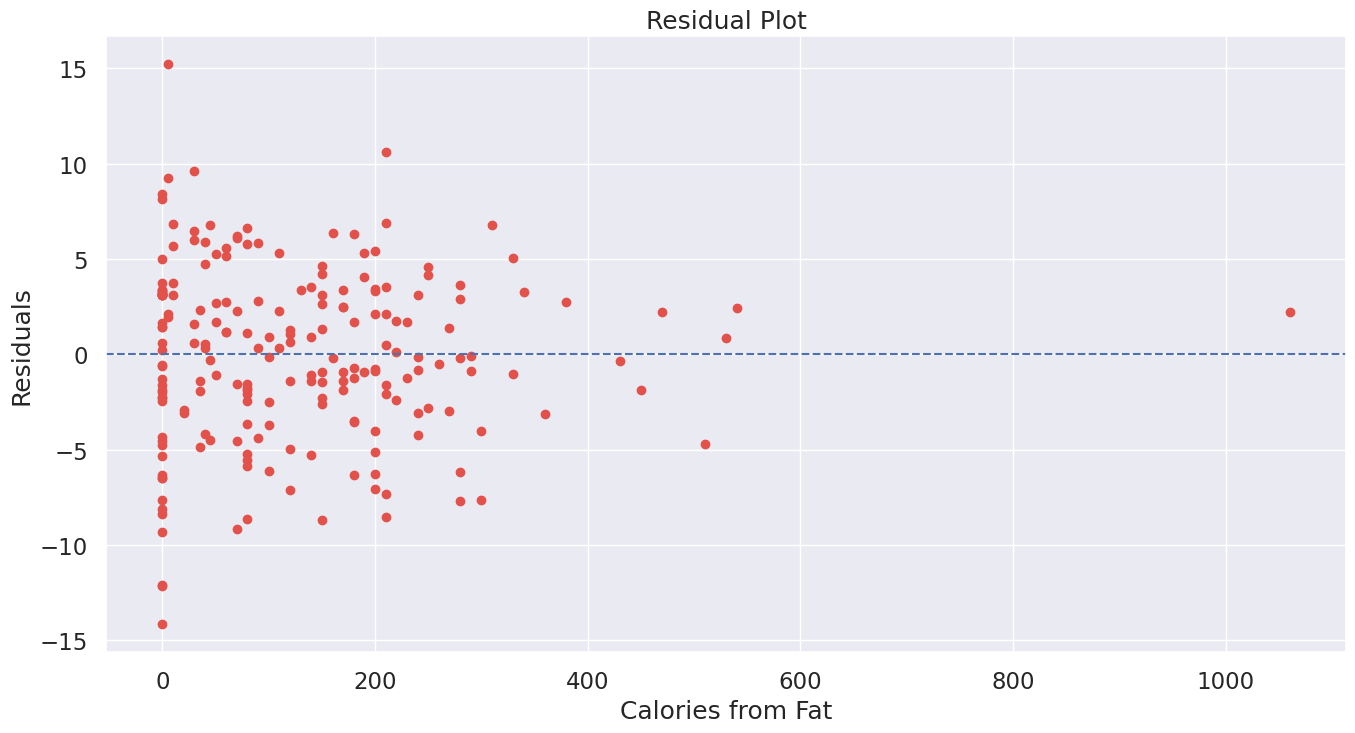

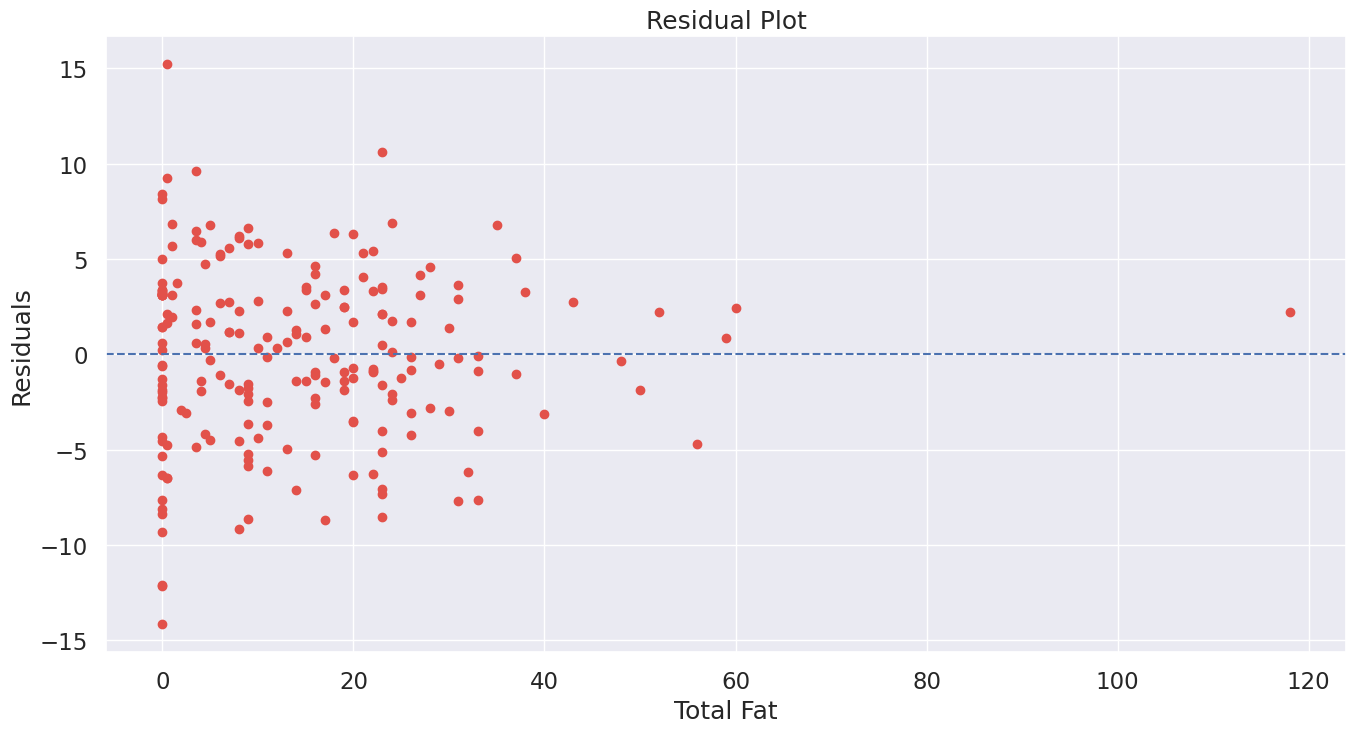

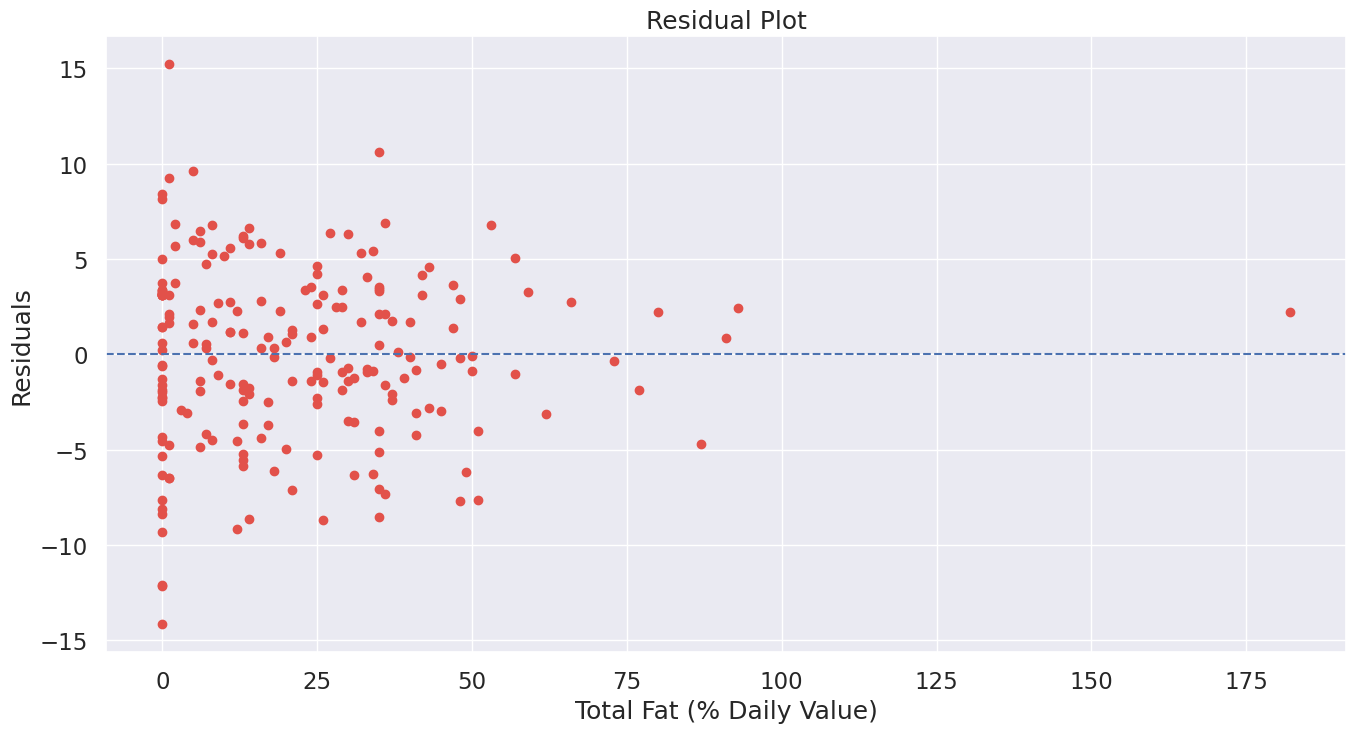

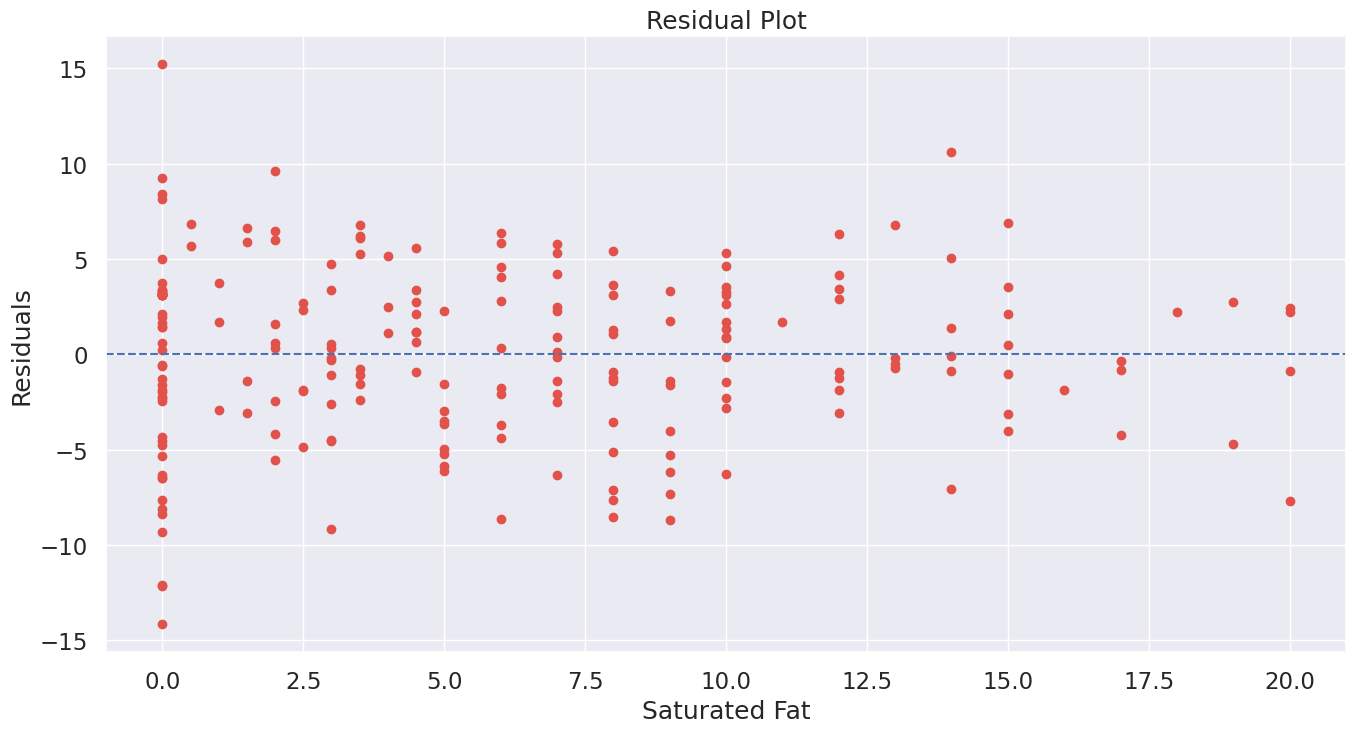

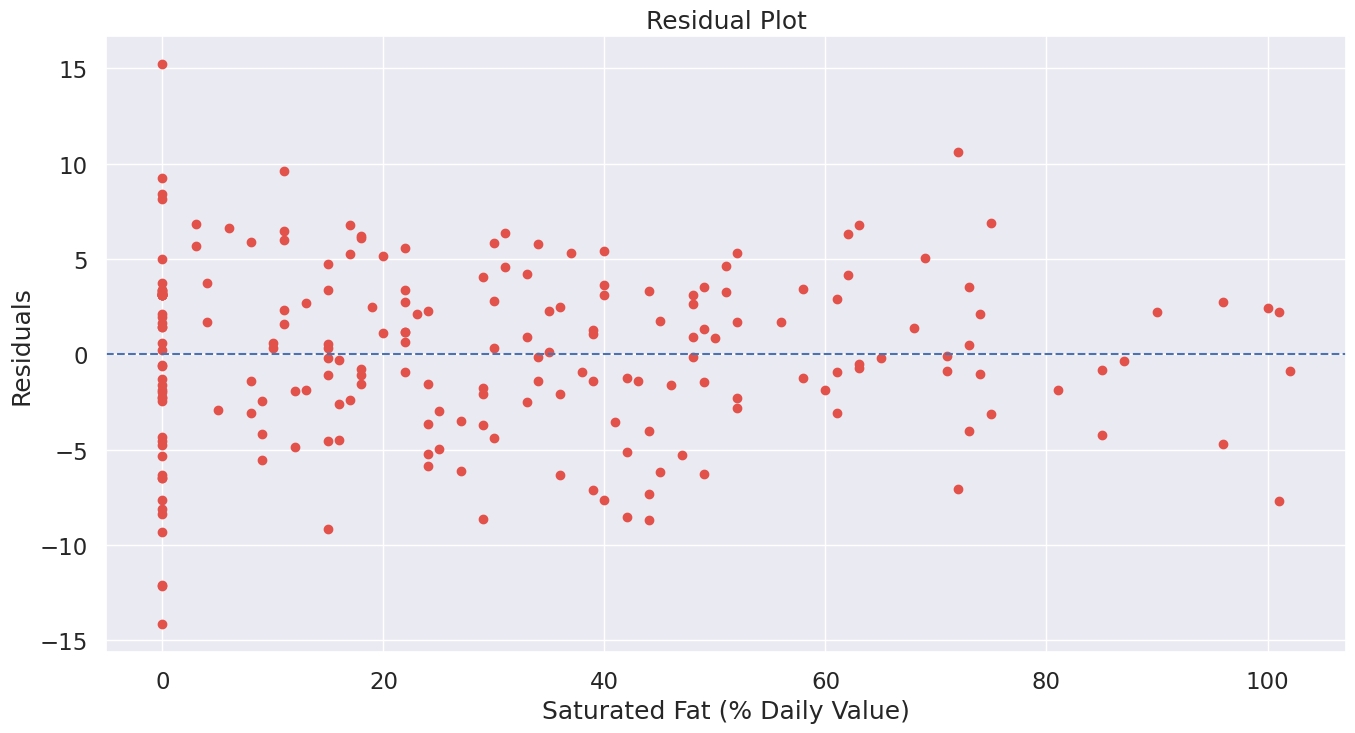

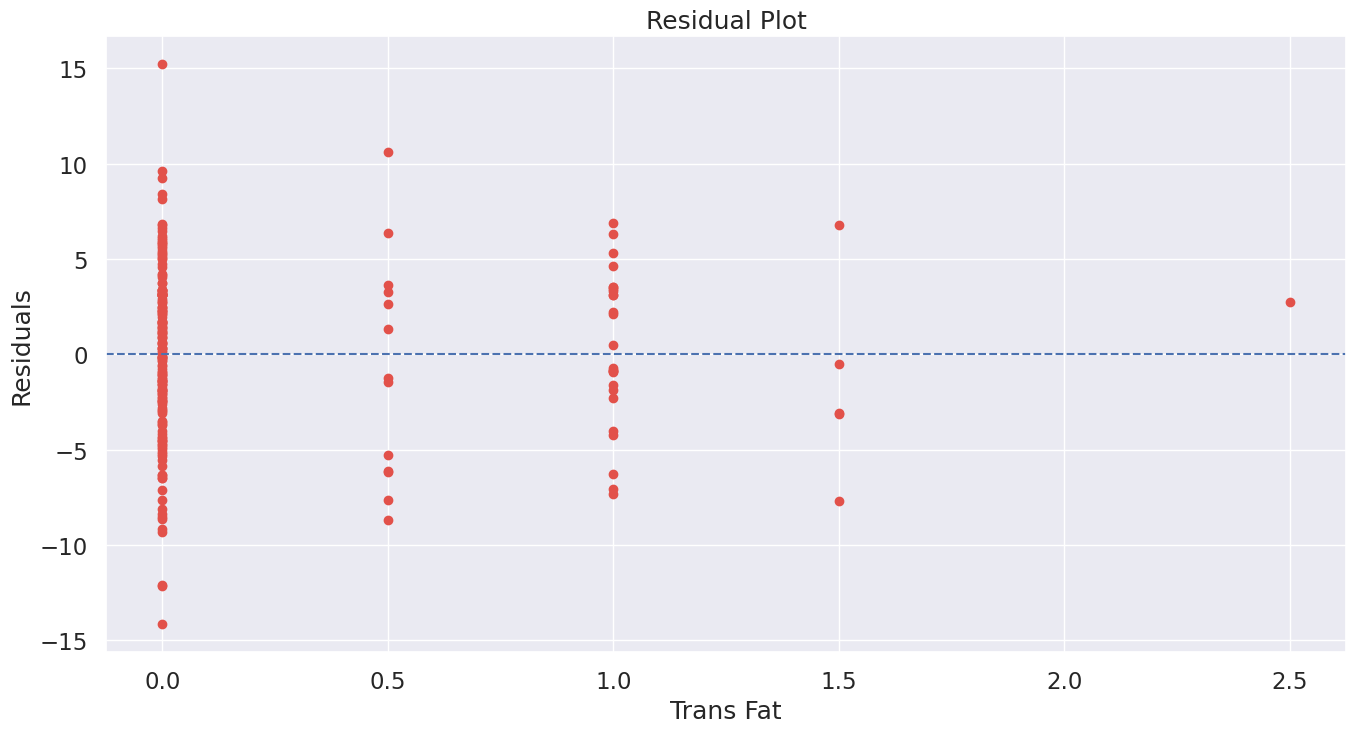

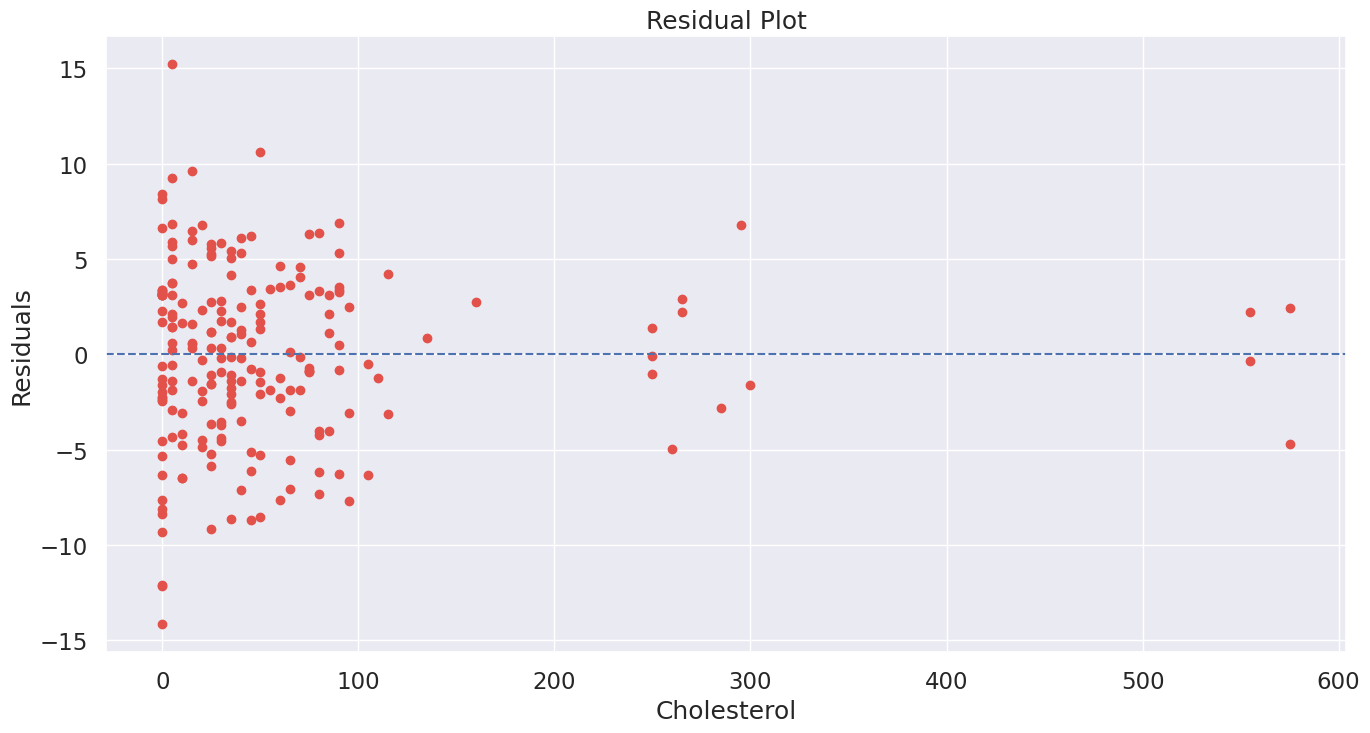

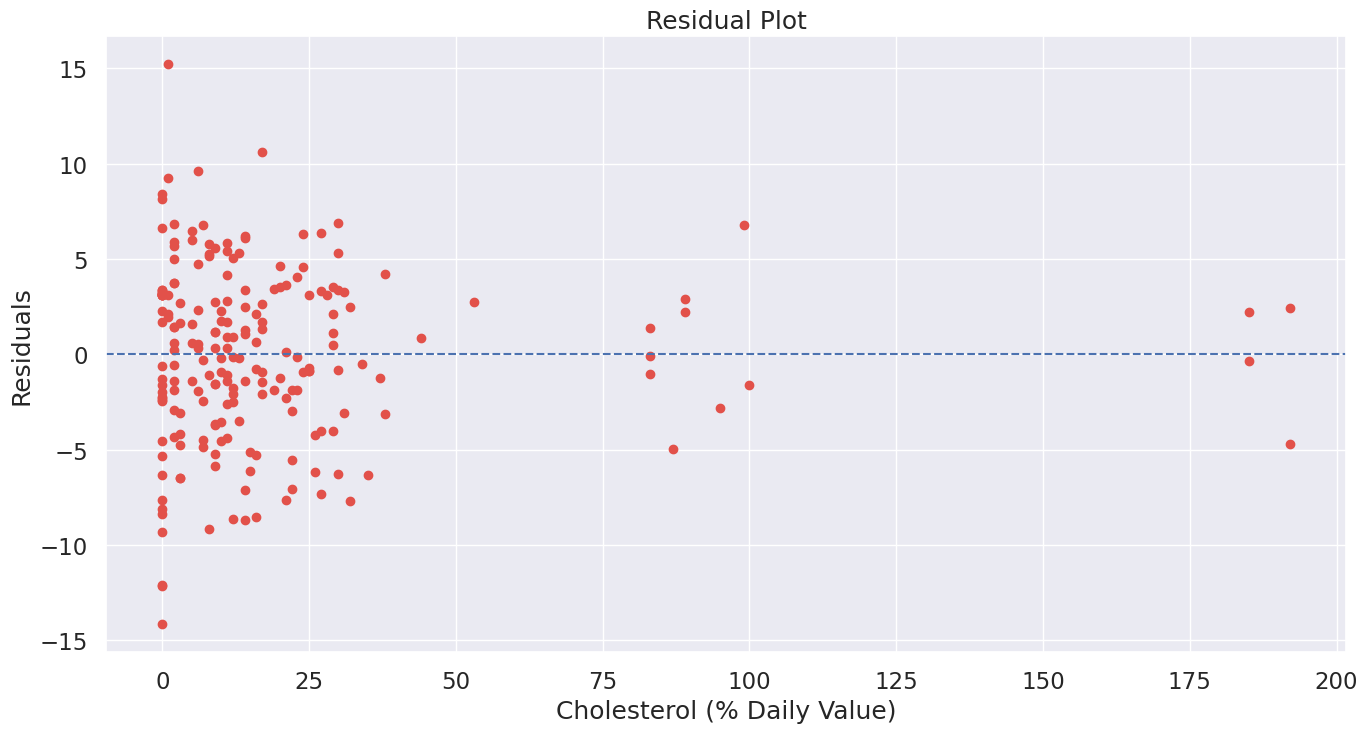

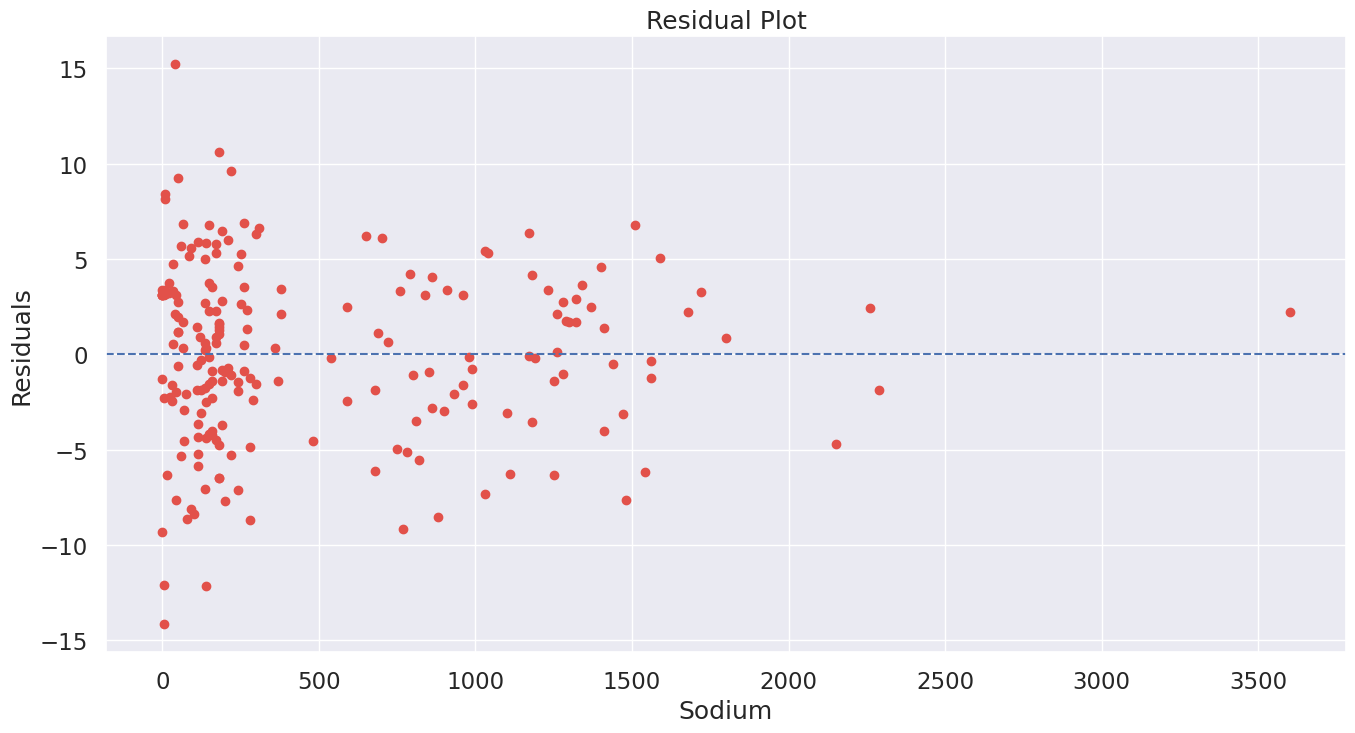

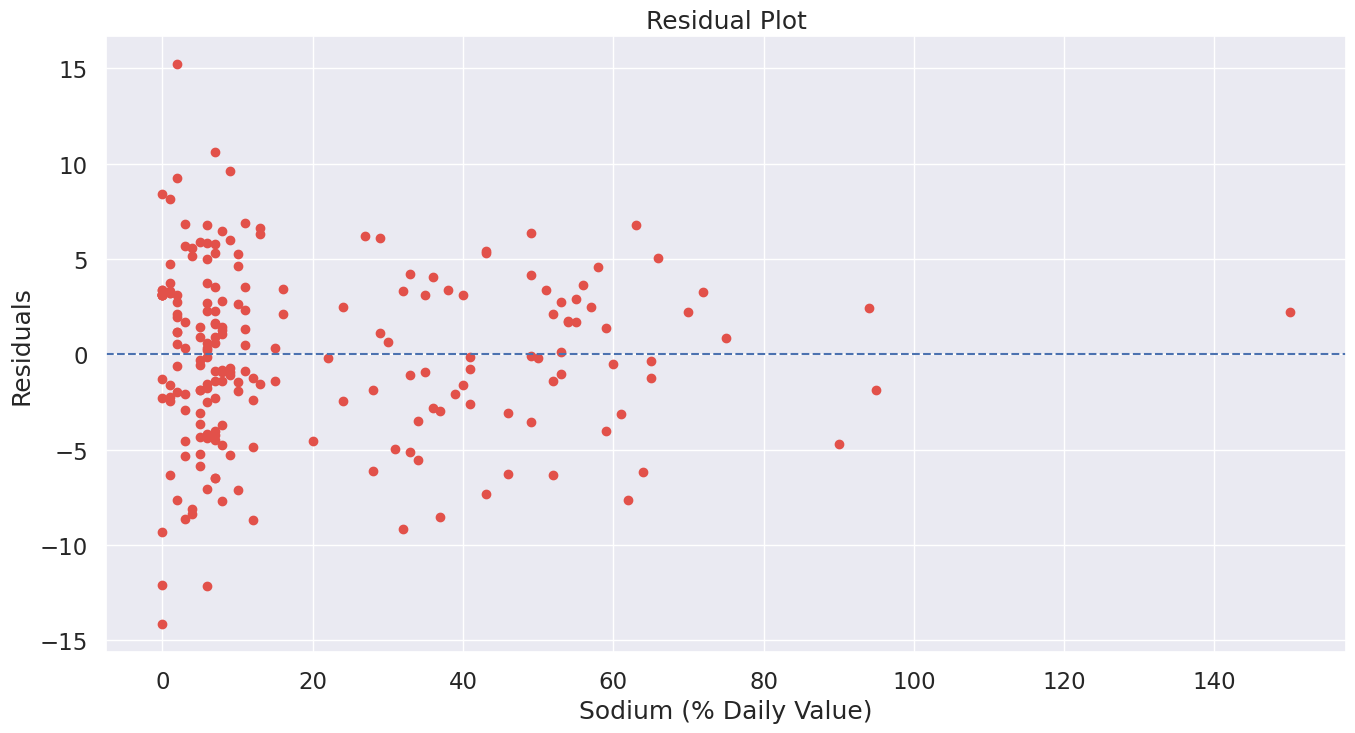

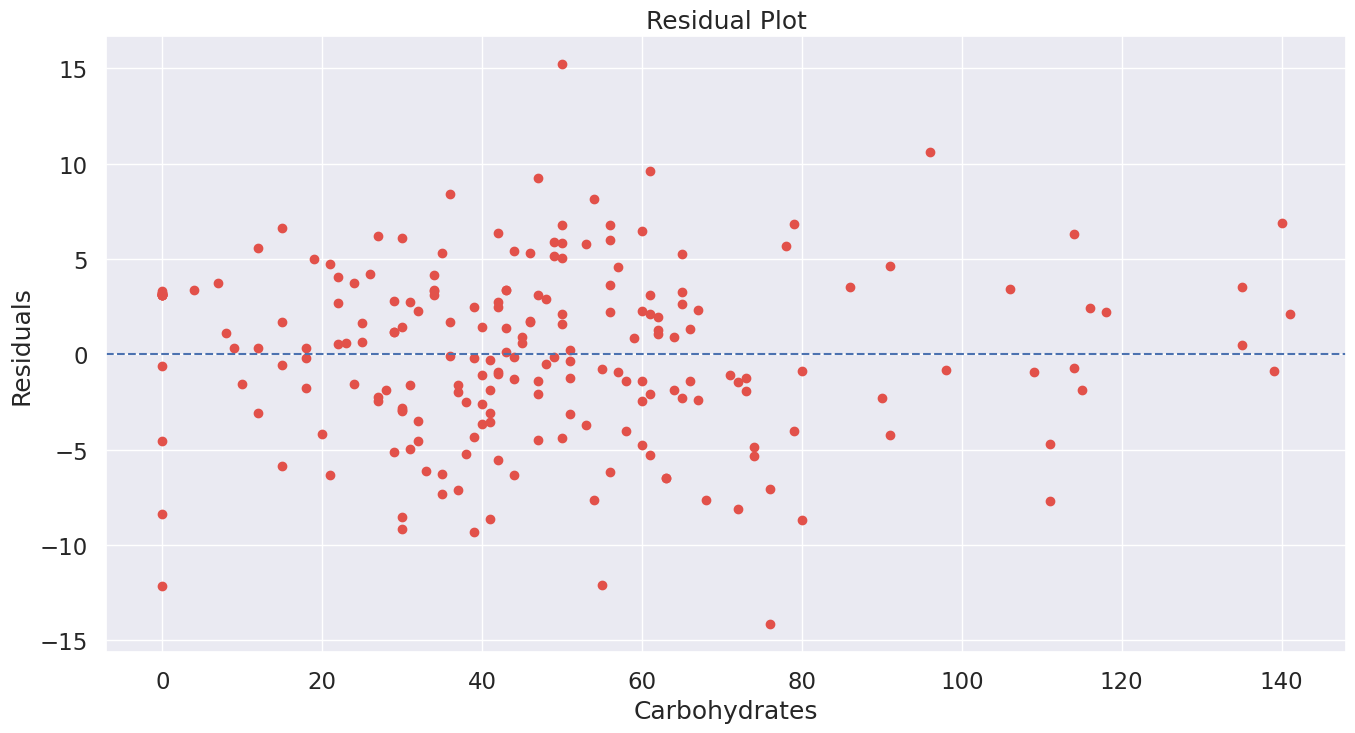

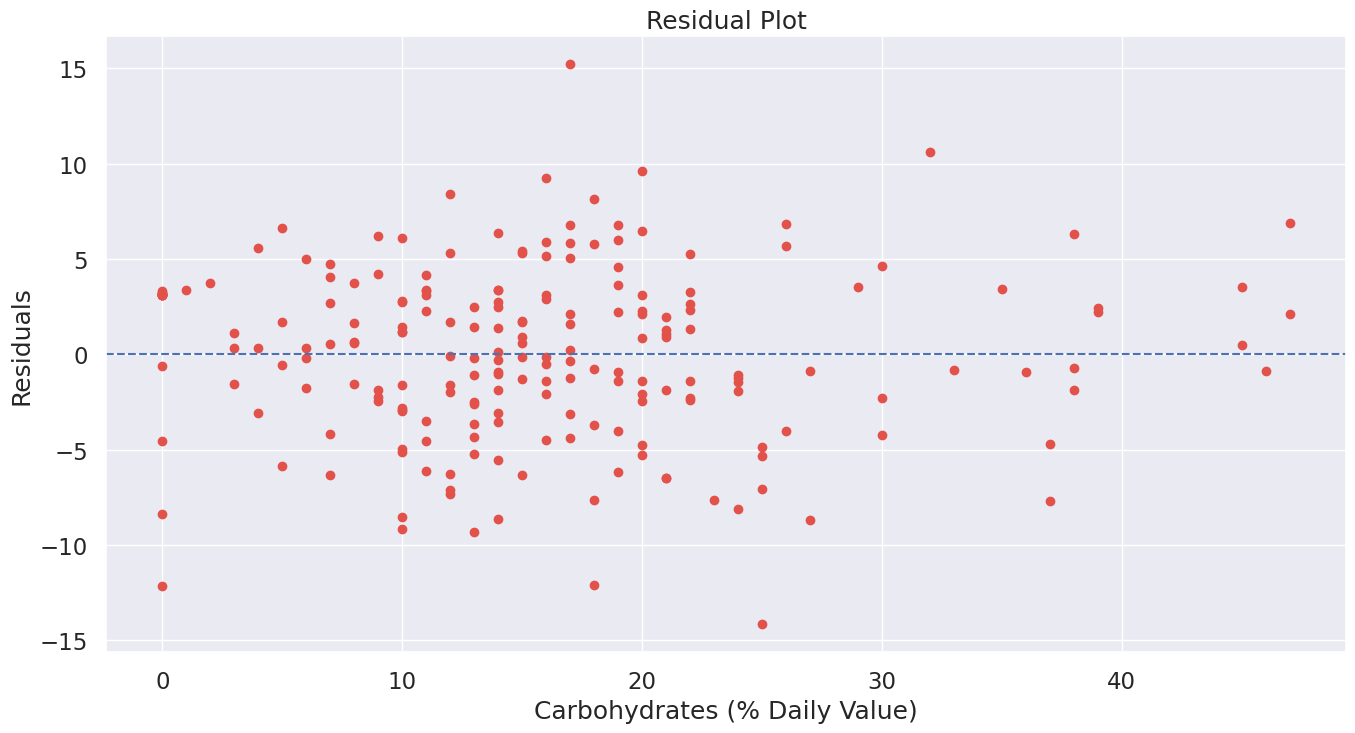

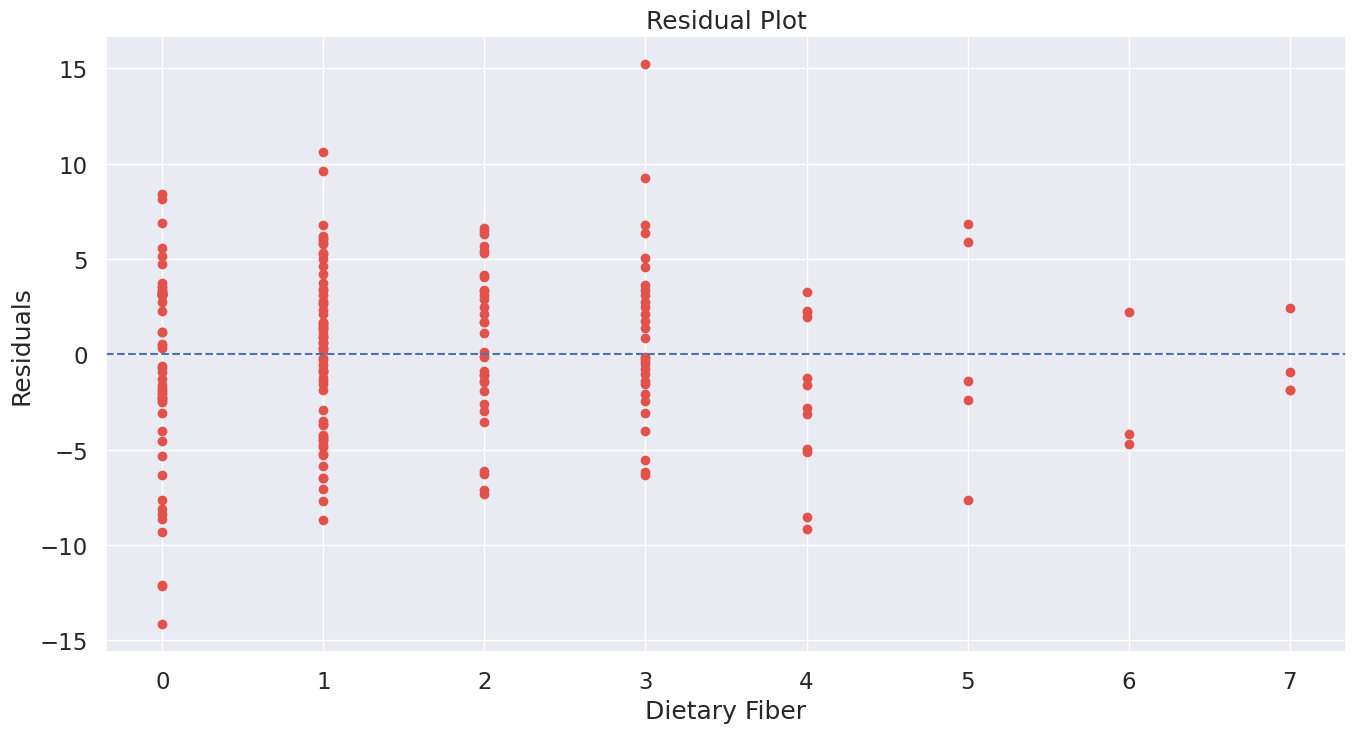

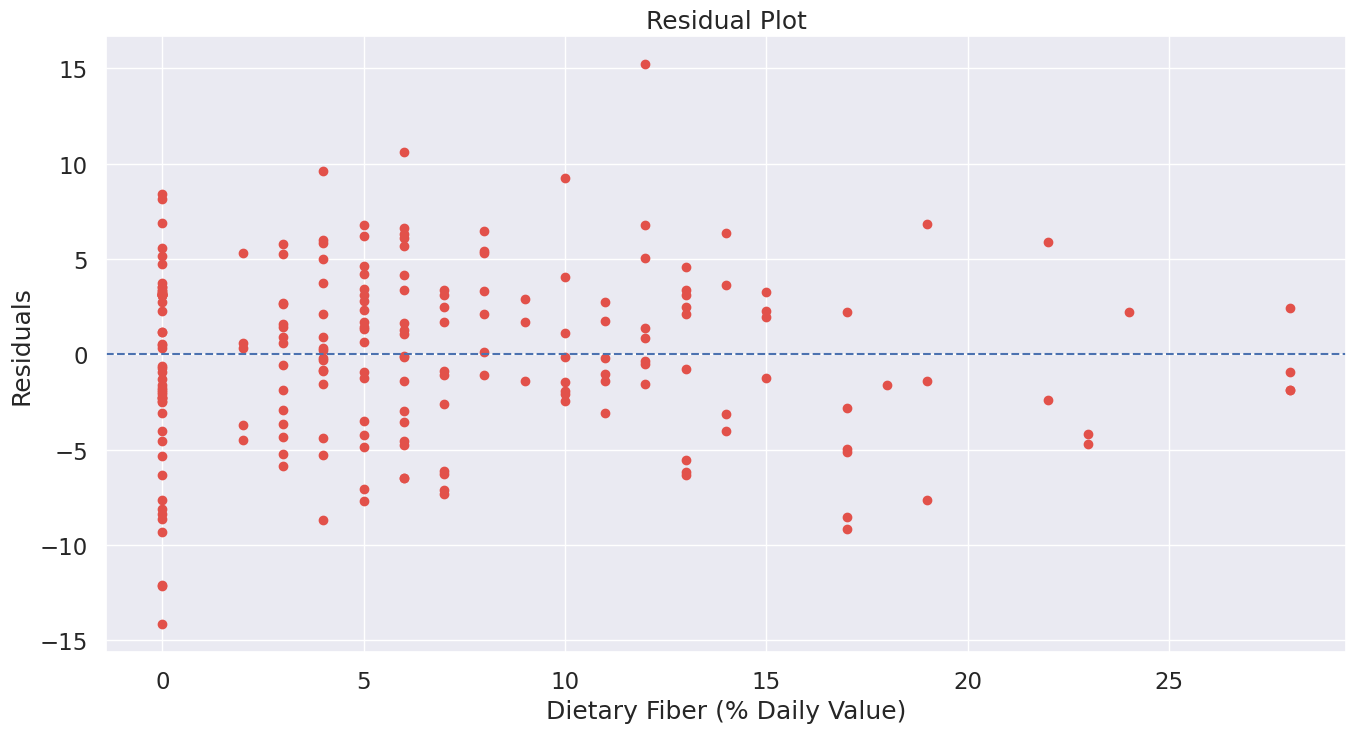

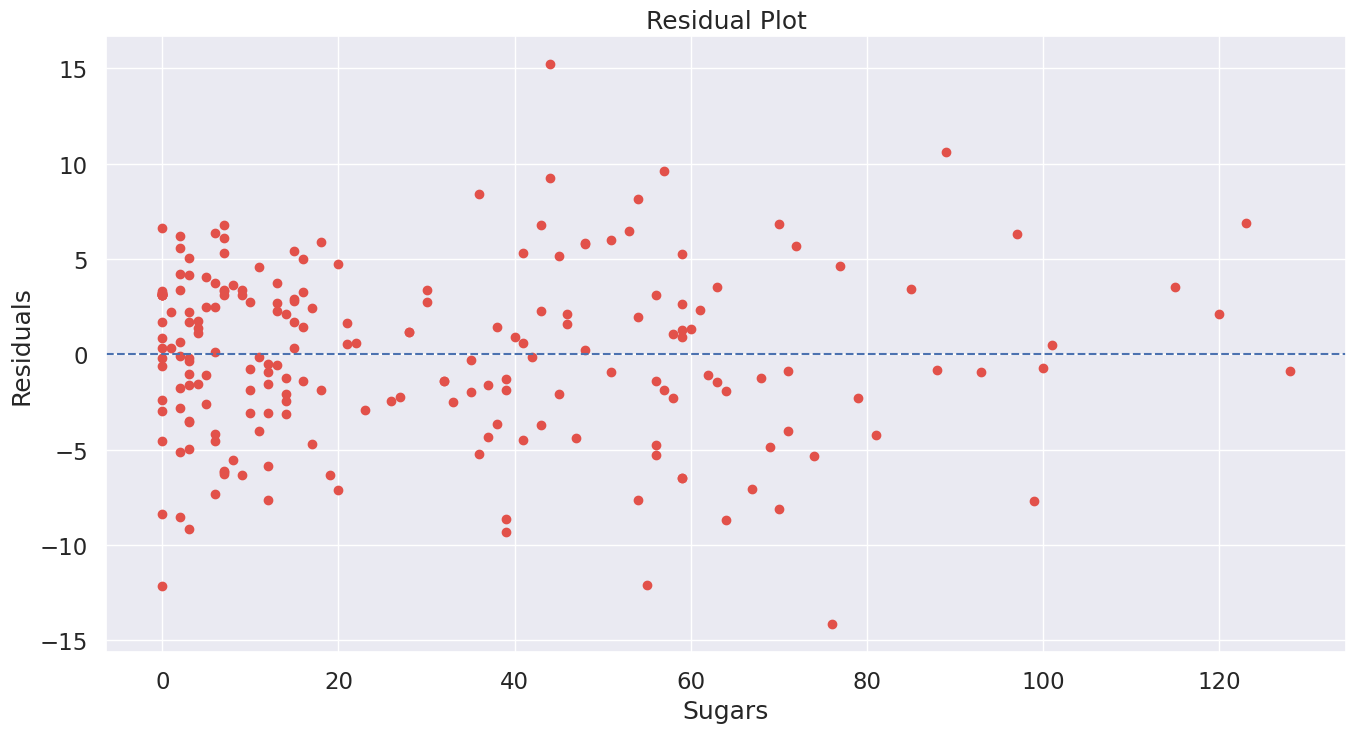

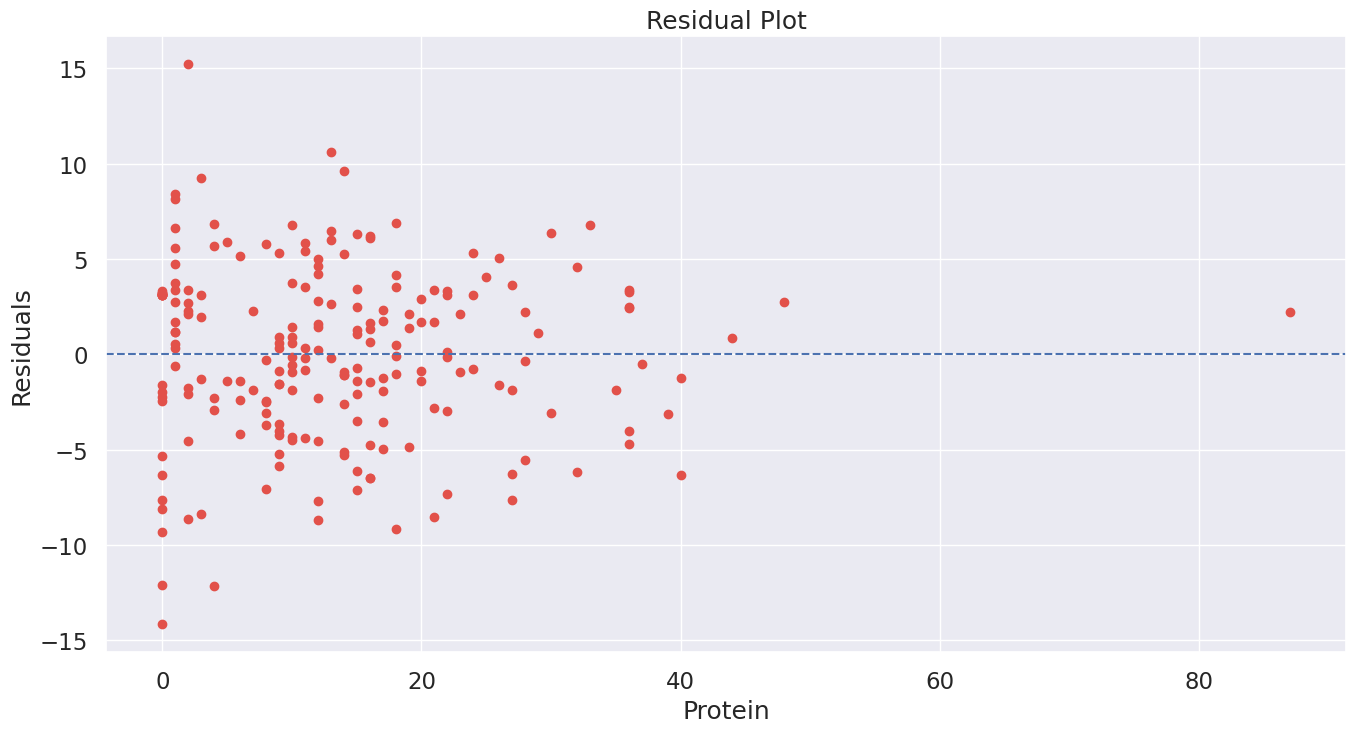

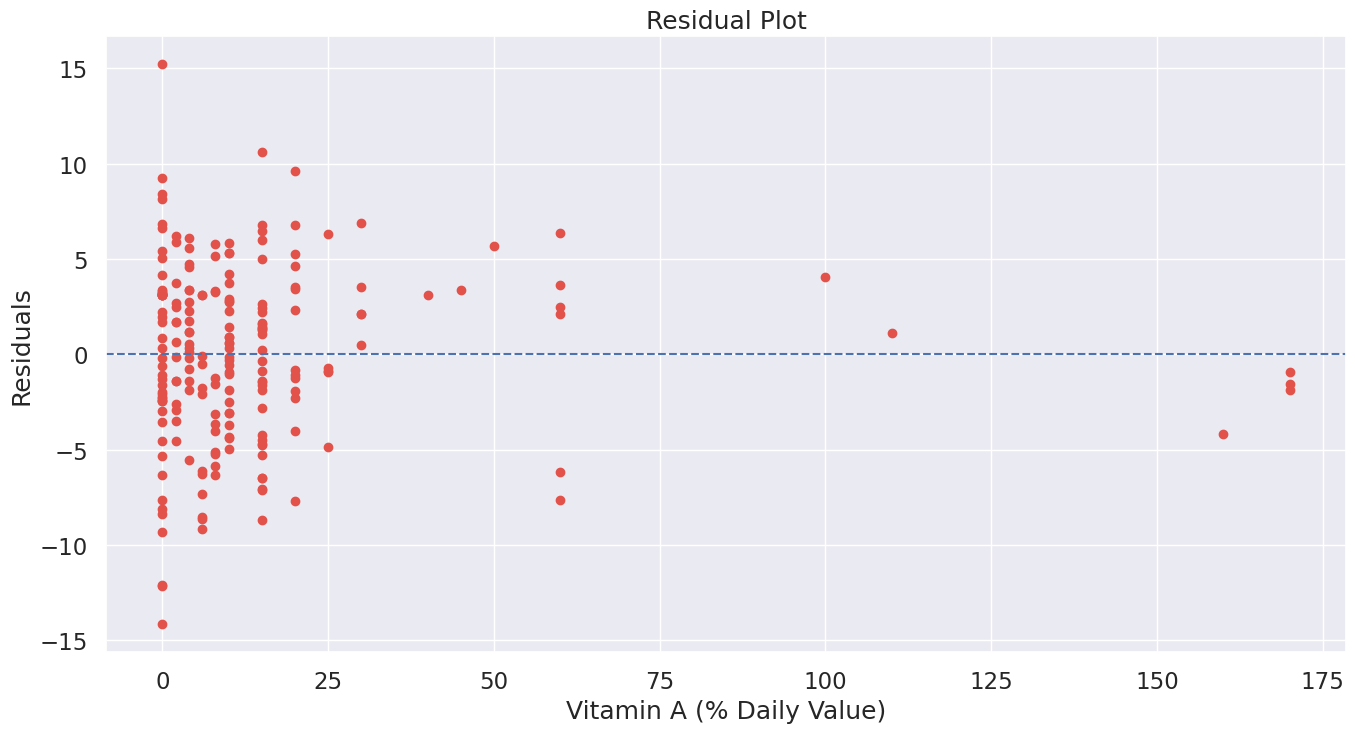

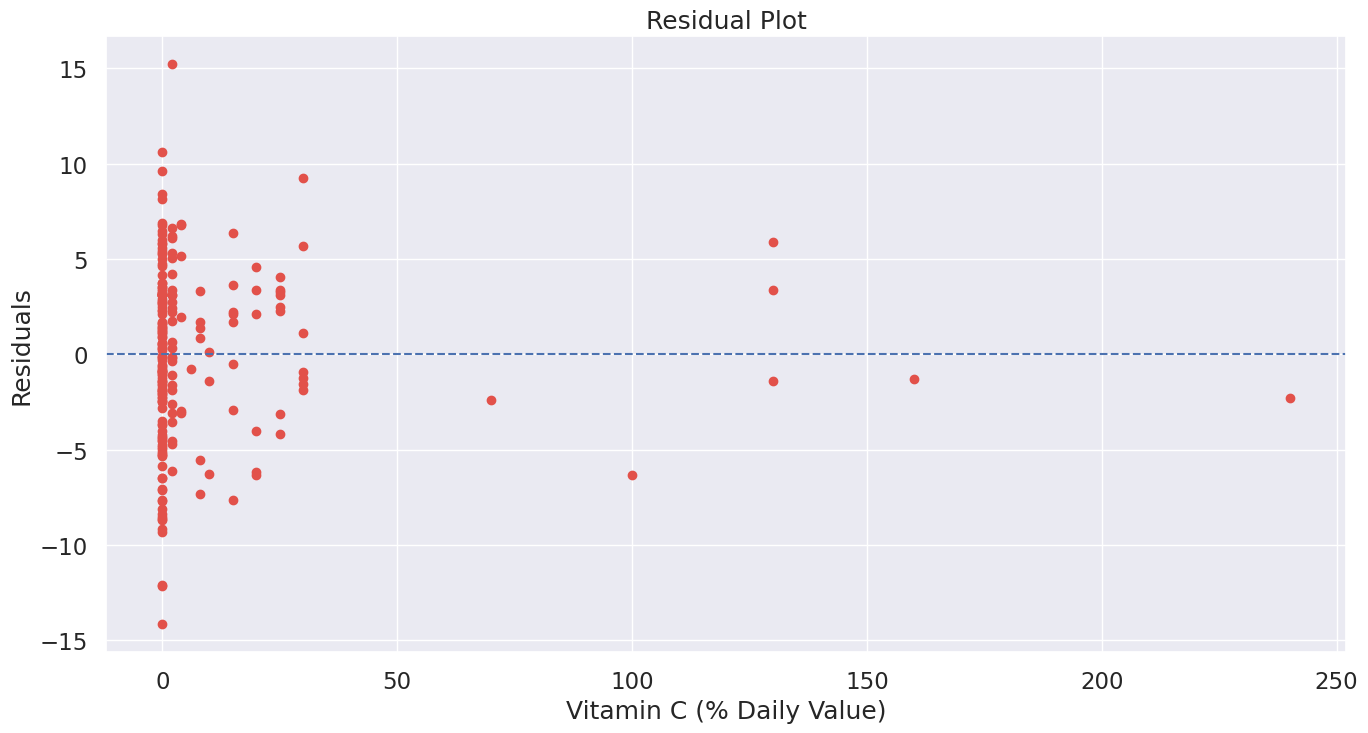

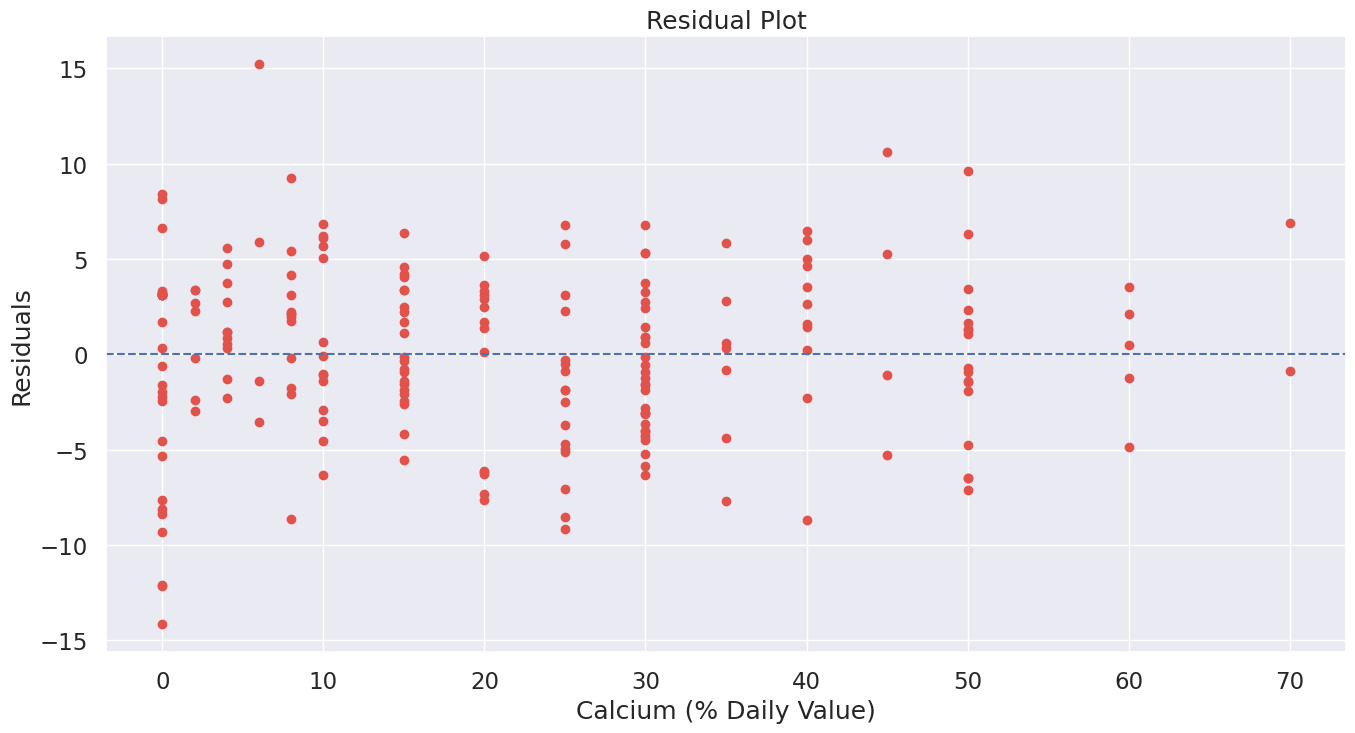

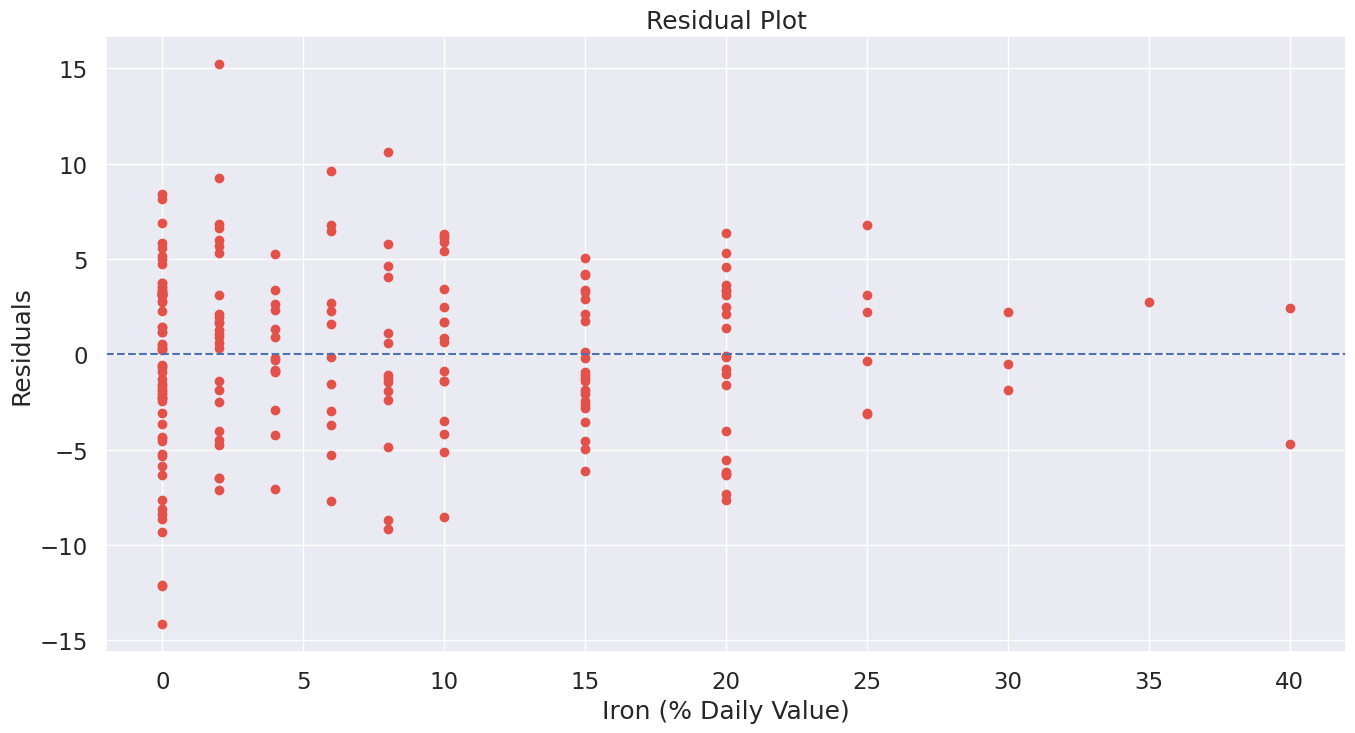

In [243]:
y_pred = model.predict(X_train)

# Calculate residuals
residuals = y_train - y_pred

for column in X_train.columns:
  plt.scatter(X_train[column], residuals)
  plt.xlabel(column)
  plt.ylabel("Residuals")
  plt.title("Residual Plot")
  plt.axhline(y=0, color='b', linestyle='--')
  plt.show()

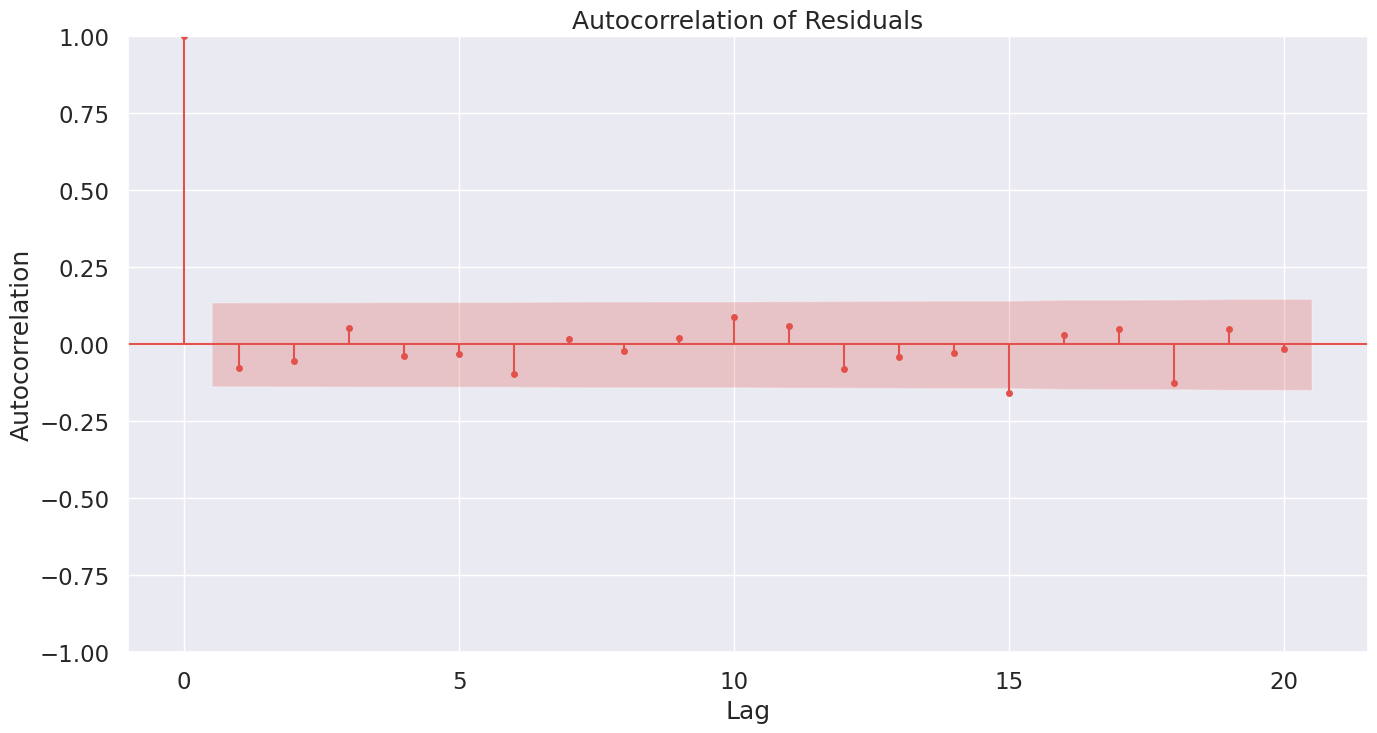

In [246]:
# Residuals Autocorrelation Plot
plot_acf(residuals, lags=20)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of Residuals")
plt.show()


The autocorrelation plot indicates that the residuals from the model do not exhibit significant autocorrelation. This is evidenced by the fact that after the initial lag (lag 0, which is always 1), the autocorrelation values fall within the confidence interval and hover around zero without showing a discernible pattern or trend.

The primary conclusion that can be drawn from this graph is that the model's residuals appear to be random, suggesting that the model has effectively captured the underlying data's temporal structure. There is no clear evidence of missed periodicities or trends in the residuals, which implies that the model residuals are behaving as white noise.

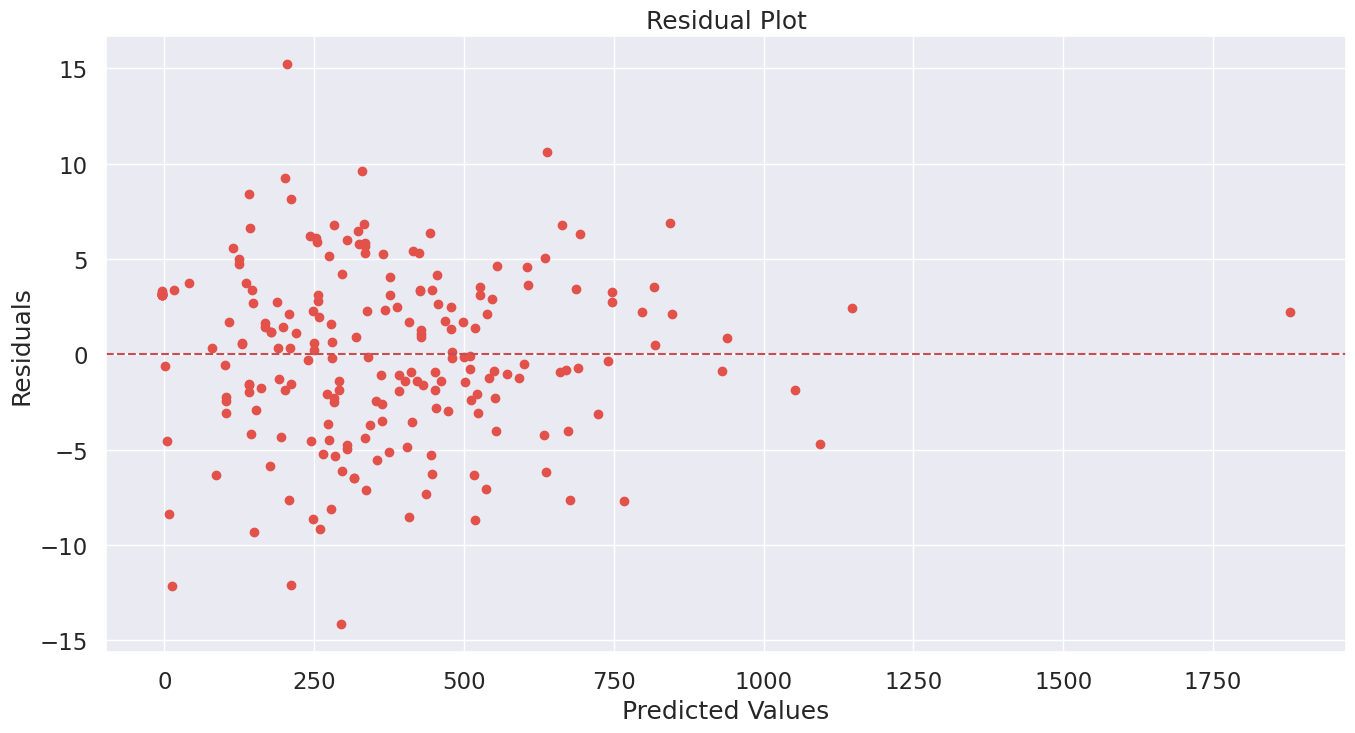

In [247]:
# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate residuals
residuals = y_train - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

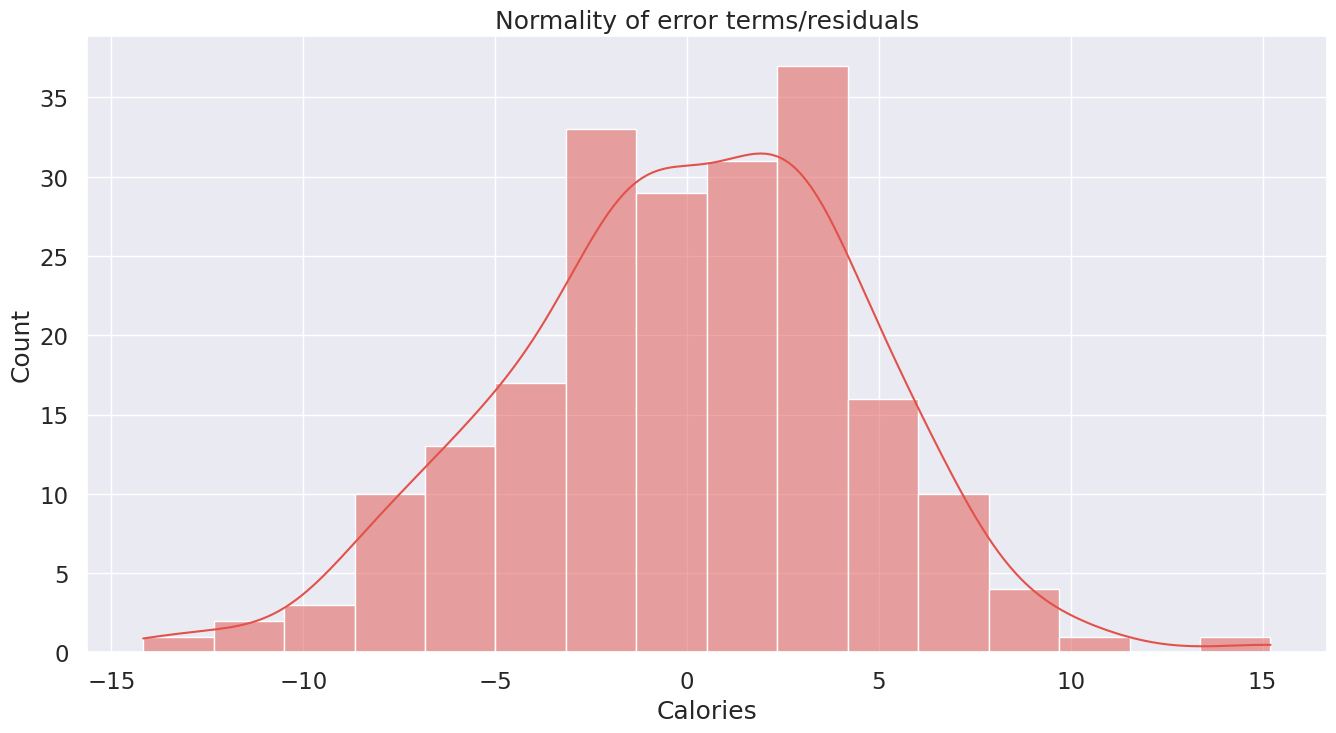

In [248]:
p = sns.histplot(residuals, kde=True)
p = plt.title('Normality of error terms/residuals')

The smooth curve appears to be a normal distribution fitted to the data. The presence of this curve suggests an attempt to compare the distribution of residuals against the theoretical normal distribution.

## **Is there any multicollinearity in the model?**

In [250]:
dff.corr()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Serving Size,1.000000,0.634260,0.723090,0.722048,0.721936,0.481414,0.485480,0.182214,0.488889,0.487938,...,0.228204,0.227167,0.709638,0.714702,-0.310909,0.743394,0.287114,0.109594,-0.017601,0.779157
Calories,0.634260,1.000000,0.904588,0.904409,0.904123,0.845564,0.847631,0.522441,0.596399,0.595208,...,0.781539,0.781242,0.538894,0.540014,0.259598,0.787847,0.108844,-0.068747,0.428426,0.643552
Calories from Fat,0.723090,0.904588,1.000000,0.999663,0.999725,0.847008,0.849592,0.433686,0.682161,0.681607,...,0.461672,0.461463,0.581274,0.575621,-0.115285,0.807913,0.056731,-0.087331,0.161034,0.735894
Total Fat,0.722048,0.904409,0.999663,1.000000,0.999765,0.846707,0.849293,0.431453,0.680547,0.680000,...,0.461213,0.461005,0.580837,0.575206,-0.115446,0.807773,0.054434,-0.089354,0.162860,0.734685
Total Fat (% Daily Value),0.721936,0.904123,0.999725,0.999765,1.000000,0.847379,0.849973,0.433016,0.680940,0.680378,...,0.460516,0.460298,0.580592,0.575033,-0.115761,0.807922,0.054038,-0.089353,0.162031,0.735478
Saturated Fat,0.481414,0.845564,0.847008,0.846707,0.847379,1.000000,0.999279,0.620611,0.631210,0.630334,...,0.591261,0.591743,0.351818,0.347152,0.197734,0.603028,0.064972,-0.179672,0.403311,0.578062
Saturated Fat (% Daily Value),0.485480,0.847631,0.849592,0.849293,0.849973,0.999279,1.000000,0.620210,0.633603,0.632712,...,0.591322,0.591655,0.356831,0.351797,0.195928,0.606581,0.065376,-0.178059,0.401139,0.580488
Trans Fat,0.182214,0.522441,0.433686,0.431453,0.433016,0.620611,0.620210,1.000000,0.253935,0.251502,...,0.463250,0.462891,0.054918,0.058301,0.334756,0.388249,0.075833,-0.076612,0.385331,0.325476
Cholesterol,0.488889,0.596399,0.682161,0.680547,0.680940,0.631210,0.633603,0.253935,1.000000,0.999855,...,0.270977,0.272662,0.435575,0.440266,-0.135518,0.561561,0.080239,-0.082978,0.132077,0.655000
Cholesterol (% Daily Value),0.487938,0.595208,0.681607,0.680000,0.680378,0.630334,0.632712,0.251502,0.999855,1.000000,...,0.269300,0.270992,0.434940,0.439814,-0.136459,0.560957,0.080059,-0.083315,0.132382,0.653167


## Does the model make sense?


In [253]:
X= dff[significant_variables]
y = dff['Calories']

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [255]:
# Intialize the linear regression model
model = LinearRegression()

#Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [256]:
# Make predictions using the training set
y_pred = model.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 22.22
Coefficient of determination: 1.00
R^2 score on tarining set = 0.9996388203728105


## **Does Regularization help**?

In [257]:
from sklearn.linear_model import Lasso
# Initialize Lasso Regression model
# Alpha is the regularization strength; larger values specify stronger regularization.
lasso = Lasso(alpha=1.0)

# Fit the Lasso model on the training data
lasso.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse}")

# The coefficients of the model can be accessed using lasso.coef_
print(f"Coefficients: {lasso.coef_}")


Mean Squared Error: 26.900709092093503
Coefficients: [ 3.83601209  4.05756818 -0.13192246  5.87473031  0.05501807  0.1769976
 -0.09394973  0.          0.        ]


Which Hyperparameters are important?

In [258]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'X' and 'y' are already defined and contain your dataset

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LassoCV to find the optimal alpha values with cross-validation
# The number of alphas to try is set by n_alphas, increase this number for a more fine-grained search
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000, n_alphas=100)

# Fit the LassoCV model on the training data
lasso_cv.fit(X_train, y_train)

# Retrieve the alpha values tried during cross-validation and corresponding mean squared errors
alphas = lasso_cv.alphas_
mse_path = lasso_cv.mse_path_

# Calculate the mean MSE for each alpha across folds
mean_mse = mse_path.mean(axis=1)

# Combine the alphas and their corresponding mean MSE into a single array
alpha_mse_pairs = np.column_stack((alphas, mean_mse))

# Sort the pairs based on mean MSE
sorted_alpha_mse_pairs = alpha_mse_pairs[np.argsort(alpha_mse_pairs[:, 1])]

# Get the top 5 alpha values (with the lowest mean MSE)
top_5_alphas = sorted_alpha_mse_pairs[:5, 0]

# Print the top 5 alpha values
print(f"Top 5 alpha values: {top_5_alphas}")


Top 5 alpha values: [5.66167749 6.0708312  6.5095533  6.97998064 7.48440445]


### **Summary:**

**1) Is the relationship significant?**

Yes, the relationship between the predictor variables and the response variable is deemed significant based on both AutoML rankings, variable importance analysis and p values obtained through OLS.

**2) Are any model assumptions violated?**

No Clear Patterns(Linearity): The absence of clear patterns (such as curves or clusters) suggests that the model's assumptions of linearity and homoscedasticity (equal variance of residuals) hold true. In this plot, while there is a slight funnel shape, where the spread of residuals increases with the predicted value, there isn't a strong pattern that would indicate non-linearity.

Potential Outliers: There are a few points that stand out from the main cluster of data points, particularly one at the higher end of predicted values. These may be outliers or influential points that could have a disproportionate impact on the model fit.

Homoscedasticity: The residuals do not seem to display a constant variance across all levels of predicted values. The spread of residuals seems to increase as the predicted values increase, indicating potential heteroscedasticity. A model that correctly captures the variance in the data would show residuals with consistent spread across the range of predicted values.

Normality: The curve that overlays the histogram looks like a normal distribution curve, which is used to assess how well the data fit a normal distribution.If the histogram bars forms a symmetric pattern around the center and the curve appears to be a bell shape, this is a sign that the data are approximately normally distributed.


Overall Model Fit: The model seems to have an adequate fit for most of the data, as the residuals are relatively close to the horizontal axis, though the potential issues mentioned above could be addressed for improving the model.

**3) Is there any multicollinearity in the model?**

Yes, the high correlation coefficients among variables such as Calories from Fat,	Total Fat,	Total Fat (% Daily Value),	Saturated Fat indicate the presence of multicollinearity in the model

**4) In the multivariate models are predictor variables independent of all the other predictor variables?**

In the given multivariate models, the predictor variables are not independent of each other. The correlation matrix indicates multicollinearity. for insatnce
total fat - saturaated fat
sodium - serving size

**5) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
Protein                          4.759175e-94
Carbohydrates                    9.962111e-22
Sugars                           2.920605e-05
Total Fat (% Daily Value)        2.733551e-04
Vitamin C (% Daily Value)        7.679593e-04
Calcium (% Daily Value)          1.778316e-03
Dietary Fiber (% Daily Value)    5.324444e-03
Total Fat                        8.271482e-03
Dietary Fiber                    2.716506e-02


**6) Does the model make sense?**

 the model appears to have a high degree of predictive accuracy on the training set, it's crucial to perform additional validation, like cross-validation or testing on an independent test set, to ensure the model's robustness and generalizability.

**7) Does regularization help?**

no, it doesn't. mean squared error does not have much impact

8)Which independent variables are significant?
Top 5 alpha values: [5.66167749 6.0708312  6.5095533  6.97998064 7.48440445]